In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Data Knowlegde

In [24]:
air_quality = pd.read_csv("../data/air_quality.csv")
air_quality.head()

who_region iso3 country_name          city    year  \
0      4_Eur  ESP        Spain  A Coruna/ESP  2013.0   
1      4_Eur  ESP        Spain  A Coruna/ESP  2014.0   
2      4_Eur  ESP        Spain  A Coruna/ESP  2015.0   
3      4_Eur  ESP        Spain  A Coruna/ESP  2016.0   
4      4_Eur  ESP        Spain  A Coruna/ESP  2017.0   

                                             version  pm10_concentration  \
0  V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...              23.238   
1           V6.0  (2023), V6.0  (2023), V6.0  (2023)              27.476   
2  V6.0  (2023), V6.0  (2023), V6.0  (2023), V6.0...              25.515   
3  V6.0  (2023), V6.0  (2023), V6.0  (2023), V6.0...              23.057   
4  V6.0  (2023), V6.0  (2023), V6.0  (2023), V6.0...              26.849   

   pm25_concentration  no2_concentration  pm10_tempcov  pm25_tempcov  \
0              11.491             28.841          87.0          46.0   
1              15.878             19.575          96.0          88.0   
2              14.004             22.731          98.0          71.0   
3              13.160             20.204          98.0          98.0   
4              14.114             21.543          97.0          97.0   

   no2_tempcov                  type_of_stations reference web_link  \
0         93.0            Urban, Urban, Suburban       NaN      NaN   
1         95.0            Urban, Urban, Suburban       NaN      NaN   
2         98.0  Urban, Urban, Suburban, Suburban       NaN      NaN   
3         98.0  Urban, Urban, Suburban, Suburban       NaN      NaN   
4         98.0  Urban, Urban, Suburban, Suburban       NaN      NaN   

   population               population_source   latitude  longitude  who_ms  
0    246146.0  manual, manual, manual, manual  43.367900  -8.418571       1  
1    247604.0                             NaN  43.368033  -8.418233       1  
2    247604.0                             NaN  43.370375  -8.422900       1  
3    247604.0                             NaN  43.370375  -8.422900       1  
4    247604.0                             NaN  43.370375  -8.422900       1

In [25]:
air_quality.drop(columns=['who_region', 'country_name', 'type_of_stations', 'reference','web_link', 'population_source', 'version'], inplace=True)

In [26]:
air_quality.head()

iso3          city    year  pm10_concentration  pm25_concentration  \
0  ESP  A Coruna/ESP  2013.0              23.238              11.491   
1  ESP  A Coruna/ESP  2014.0              27.476              15.878   
2  ESP  A Coruna/ESP  2015.0              25.515              14.004   
3  ESP  A Coruna/ESP  2016.0              23.057              13.160   
4  ESP  A Coruna/ESP  2017.0              26.849              14.114   

   no2_concentration  pm10_tempcov  pm25_tempcov  no2_tempcov  population  \
0             28.841          87.0          46.0         93.0    246146.0   
1             19.575          96.0          88.0         95.0    247604.0   
2             22.731          98.0          71.0         98.0    247604.0   
3             20.204          98.0          98.0         98.0    247604.0   
4             21.543          97.0          97.0         98.0    247604.0   

    latitude  longitude  who_ms  
0  43.367900  -8.418571       1  
1  43.368033  -8.418233       1  
2  43.370375  -8.422900       1  
3  43.370375  -8.422900       1  
4  43.370375  -8.422900       1

In [27]:
index_column = 'year'
air_quality = air_quality[[index_column] + [col for col in air_quality.columns if col != index_column]]

In [28]:
# nan_rows = air_quality[air_quality['iso3'].isna()]
# print(nan_rows)
# # air_quality.dropna(subset=['year'], inplace=True)

In [29]:
air_quality['year'] = air_quality['year'].astype(int)
air_quality.head()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [30]:
def createClusters(df):
    grouped_by_country = df.groupby('iso3')
    uniques = df['iso3'].unique()
    for cluster in uniques:
        cluster_data = grouped_by_country.get_group(cluster)
        cluster_data.to_csv(f'../data/cluster_data/{cluster}.csv', sep=';', index=False)

In [31]:
createClusters(air_quality)

# Exploratory Analysis

### Single Cluster Analysis

In [32]:
ESP = pd.read_csv("../data/cluster_data/ESP.csv", sep=";")
ESP['year'].nunique()

12

In [33]:
dataframeESP = pd.read_csv("../data/cluster_data/ESP.csv", sep=";")
ESP.set_index('year', inplace=True)
ESP.head()

iso3          city  pm10_concentration  pm25_concentration  \
year                                                                
2013.0  ESP  A Coruna/ESP              23.238              11.491   
2014.0  ESP  A Coruna/ESP              27.476              15.878   
2015.0  ESP  A Coruna/ESP              25.515              14.004   
2016.0  ESP  A Coruna/ESP              23.057              13.160   
2017.0  ESP  A Coruna/ESP              26.849              14.114   

        no2_concentration  pm10_tempcov  pm25_tempcov  no2_tempcov  \
year                                                                 
2013.0             28.841          87.0          46.0         93.0   
2014.0             19.575          96.0          88.0         95.0   
2015.0             22.731          98.0          71.0         98.0   
2016.0             20.204          98.0          98.0         98.0   
2017.0             21.543          97.0          97.0         98.0   

        population   latitude  longitude  who_ms  
year                                              
2013.0    246146.0  43.367900  -8.418571       1  
2014.0    247604.0  43.368033  -8.418233       1  
2015.0    247604.0  43.370375  -8.422900       1  
2016.0    247604.0  43.370375  -8.422900       1  
2017.0    247604.0  43.370375  -8.422900       1

### Cleaning ESP

In [34]:
ESP_cleaned = ESP.drop(columns=['population', 'pm25_tempcov', 'pm25_concentration', 'who_ms'])

### Choose year to process

In [35]:
ESP_cleaned.head()

ESP_2010 = ESP_cleaned.loc[2010]
# ESP_2010.fillna(ESP_2010.mean(numeric_only=True), inplace=True)

## Simulating Parties PMA/BMMO

In [36]:
# Define latitude and longitude bounds for each client
def assign_client(lat, lon):
    if lat >= 0 and lon >= 0:
        return 'East'
    elif lat >= 0 and lon < 0:
        return 'North'
    elif lat < 0 and lon >= 0:
        return 'South'
    else:
        return 'West'

### Assign A client based on location of the city

In [37]:
ESP_2010['client'] = ESP_2010.apply(lambda row: assign_client(row['latitude'], row['longitude']), axis=1)

In [38]:
ESP_2010.groupby('client').count()

iso3  city  pm10_concentration  no2_concentration  pm10_tempcov  \
client                                                                    
East      70    70                  17                 67            17   
North    246   246                 210                236           210   

        no2_tempcov  latitude  longitude  
client                                    
East             67        70         70  
North           236       246        246

### Take a Client and do mean interpolation

In [39]:
# Interpolate based on Location mean.
ESP_2010_east = ESP_2010[ESP_2010['client'] == 'East']
ESP_2010_east = ESP_2010_east.fillna(ESP_2010_east.mean(numeric_only=True))
ESP_2010_east

iso3                        city  pm10_concentration  \
year                                                          
2010.0  ESP                 Alcover/ESP           19.246059   
2010.0  ESP                 Alcudia/ESP           19.246059   
2010.0  ESP          Ametlla De Mar/ESP           19.246059   
2010.0  ESP                 Amposta/ESP           19.246059   
2010.0  ESP                Badalona/ESP           19.246059   
...     ...                         ...                 ...   
2010.0  ESP               Vandellos/ESP           17.149000   
2010.0  ESP               Vila Seca/ESP           19.246059   
2010.0  ESP              Viladecans/ESP           19.246059   
2010.0  ESP  Vilafranca Del Penedes/ESP           19.246059   
2010.0  ESP    Vilanova I La Geltru/ESP           19.246059   

        no2_concentration  pm10_tempcov  no2_tempcov   latitude  longitude  \
year                                                                         
2010.0             10.822     87.294118         95.0  41.280278   1.181111   
2010.0              8.513     87.294118         98.0  39.837500   3.146667   
2010.0              5.612     87.294118         91.0  40.903889   0.811111   
2010.0             17.944     87.294118         93.0  40.708056   0.582778   
2010.0             40.975     87.294118         98.0  41.449444   2.237778   
...                   ...           ...          ...        ...        ...   
2010.0              2.386     78.000000         90.0  41.009074   0.885648   
2010.0             22.379     87.294118         95.0  41.113333   1.069167   
2010.0             19.863     87.294118         92.0  41.314722   2.015000   
2010.0             21.841     87.294118         98.0  41.348611   1.687778   
2010.0             22.156     87.294118         95.0  41.220556   1.722778   

       client  
year           
2010.0   East  
2010.0   East  
2010.0   East  
2010.0   East  
2010.0   East  
...       ...  
2010.0   East  
2010.0   East  
2010.0   East  
2010.0   East  
2010.0   East  

[70 rows x 9 columns]

In [40]:
ESP_2010_north = ESP_2010[ESP_2010['client'] == 'North']
ESP_2010_north = ESP_2010_north.fillna(ESP_2010_north.mean(numeric_only=True))
ESP_2010_north

iso3                       city  pm10_concentration  no2_concentration  \
year                                                                            
2010.0  ESP      Abanto Y Ciervana/ESP              20.093             18.767   
2010.0  ESP                Aguimes/ESP              24.839             10.356   
2010.0  ESP                    Aia/ESP              11.348              6.306   
2010.0  ESP                 Alagon/ESP              21.297             24.656   
2010.0  ESP               Albacete/ESP              34.184             12.701   
...     ...                        ...                 ...                ...   
2010.0  ESP                  Zalla/ESP              17.241             17.378   
2010.0  ESP                 Zamora/ESP              17.680             15.885   
2010.0  ESP               Zaragoza/ESP              26.576             31.431   
2010.0  ESP                  Zarra/ESP              11.894              4.282   
2010.0  ESP  Zorita Del Maestrazgo/ESP              15.981              5.035   

        pm10_tempcov  no2_tempcov   latitude  longitude client  
year                                                            
2010.0          98.0         99.0  43.320556  -3.073889  North  
2010.0          99.0         99.0  27.883701 -15.414686  North  
2010.0          98.0         98.0  43.250556  -2.155000  North  
2010.0          97.0         98.0  41.762778  -1.143333  North  
2010.0          97.0         98.0  38.981667  -1.956667  North  
...              ...          ...        ...        ...    ...  
2010.0          99.0        100.0  43.213056  -3.134444  North  
2010.0          96.0         96.0  41.509722  -5.746389  North  
2010.0          98.0         98.0  41.652315  -0.893611  North  
2010.0          96.0         99.0  39.082778  -1.101111  North  
2010.0          98.0         91.0  40.735000  -0.169444  North  

[246 rows x 9 columns]

### Concat all the clients

In [41]:
ESP_2010_cleaned_location = pd.concat([ESP_2010_east, ESP_2010_north], ignore_index=False)

### Create a summary on group by client. Now nearby locations have similar data.

In [42]:
client_summary = ESP_2010_cleaned_location.groupby('client').agg(
    mean_latitude=('latitude', 'mean'),
    mean_longitude=('longitude', 'mean'),
    mean_pm10_concentration=('pm10_concentration', 'mean'),
    mean_no2_concentration=('no2_concentration', 'mean'),
    mean_pm10_tempcov=('pm10_tempcov', 'mean'),
    mean_no2_tempcov=('no2_tempcov', 'mean'),
    count=('city', 'size')
)

In [43]:
ESP_2010_cleaned_location = ESP_2010_cleaned_location.merge(client_summary, on='client', how='left')

### Drop Data Columns that had City Wise information since now we have grouped data

In [44]:
ESP_2010_cleaned_location_mean = ESP_2010_cleaned_location.iloc[:, 8:]
ESP_2010_cleaned_location_mean

client  mean_latitude  mean_longitude  mean_pm10_concentration  \
0     East      41.217022        1.760590                19.246059   
1     East      41.217022        1.760590                19.246059   
2     East      41.217022        1.760590                19.246059   
3     East      41.217022        1.760590                19.246059   
4     East      41.217022        1.760590                19.246059   
..     ...            ...             ...                      ...   
311  North      39.914424       -4.464949                21.958390   
312  North      39.914424       -4.464949                21.958390   
313  North      39.914424       -4.464949                21.958390   
314  North      39.914424       -4.464949                21.958390   
315  North      39.914424       -4.464949                21.958390   

     mean_no2_concentration  mean_pm10_tempcov  mean_no2_tempcov  count  
0                 22.610463          87.294118         94.731343     70  
1                 22.610463          87.294118         94.731343     70  
2                 22.610463          87.294118         94.731343     70  
3                 22.610463          87.294118         94.731343     70  
4                 22.610463          87.294118         94.731343     70  
..                      ...                ...               ...    ...  
311               16.811729          94.814286         95.563559    246  
312               16.811729          94.814286         95.563559    246  
313               16.811729          94.814286         95.563559    246  
314               16.811729          94.814286         95.563559    246  
315               16.811729          94.814286         95.563559    246  

[316 rows x 8 columns]

### Reduce to just group data

In [45]:
# Reduced
ESP_2010_reduced_data = ESP_2010_cleaned_location_mean.drop_duplicates(subset='client')
ESP_2010_reduced_data

client  mean_latitude  mean_longitude  mean_pm10_concentration  \
0    East      41.217022        1.760590                19.246059   
70  North      39.914424       -4.464949                21.958390   

    mean_no2_concentration  mean_pm10_tempcov  mean_no2_tempcov  count  
0                22.610463          87.294118         94.731343     70  
70               16.811729          94.814286         95.563559    246

In [46]:
import plotly.express as px
fig = px.scatter_geo(ESP_2010_cleaned_location,
                     lat='mean_latitude', 
                     lon='mean_longitude', 
                     hover_name='city',
                     size='count',  # Size of points based on pm10 concentration
                     color='no2_concentration',  # Color based on no2 concentration
                     projection='natural earth',
                     title="Air Quality Measurements in 2010")

# Show the map
fig.show()

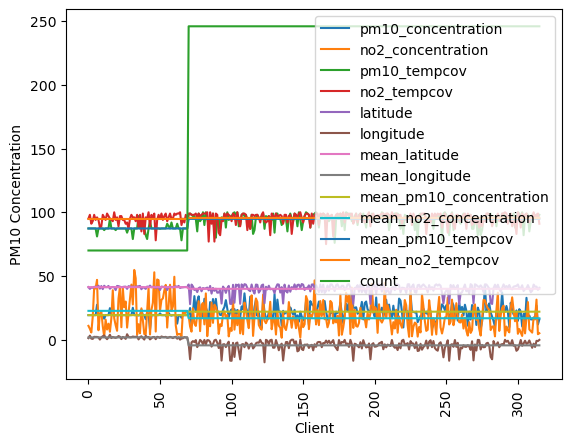

In [47]:
ESP_2010_cleaned_location.plot()
# Rotate x-axis labels
plt.xticks(rotation=90)  # Adjust the angle as needed

# Optionally label axes and show the plot
plt.xlabel("Client")  # Add a label for x-axis if needed
plt.ylabel("PM10 Concentration")  # Add a label for y-axis
plt.show()

### Plot Above

We can see North and East clients has some data pattern

### Analysing Missing Values

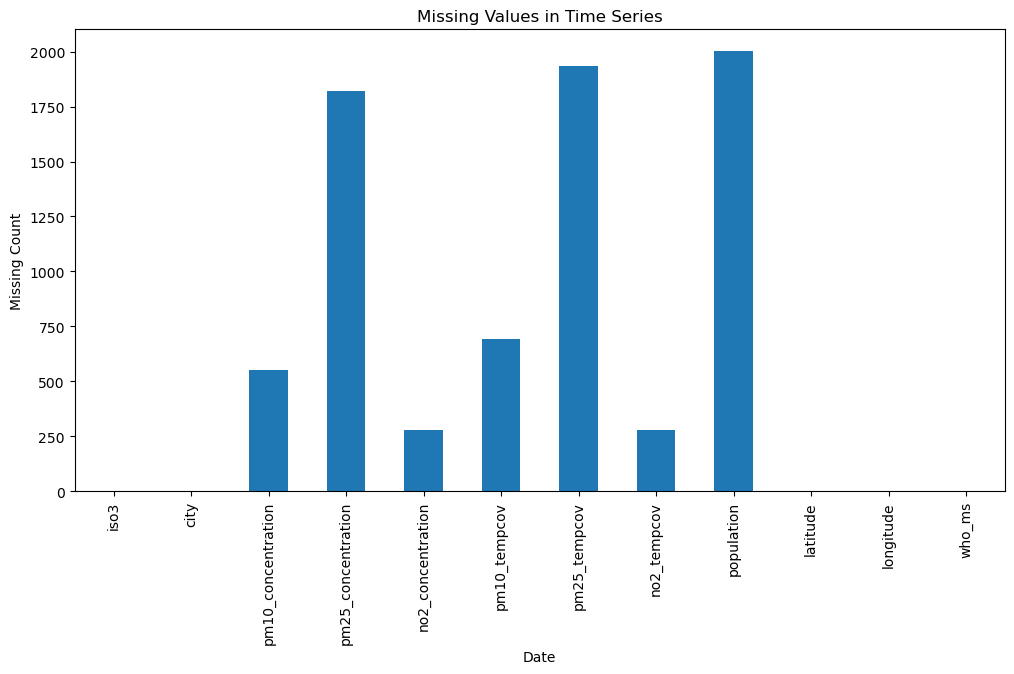

iso3                   0.000000
city                   0.000000
pm10_concentration    16.512115
pm25_concentration    54.412205
no2_concentration      8.375710
pm10_tempcov          20.789710
pm25_tempcov          57.882142
no2_tempcov            8.375710
population            59.856416
latitude               0.000000
longitude              0.000000
who_ms                 0.000000
dtype: float64


In [48]:
# Plot missing values over time
plt.figure(figsize=(12, 6))
plt.title("Missing Values in Time Series")
plt.xlabel("Date")
plt.ylabel("Missing Count")
ESP.isnull().sum().plot(kind='bar')
plt.show()

# Show percentage of missing values for each column
print(ESP.isnull().mean() * 100)

In [49]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# ESP_no_2_dropped = ESP.dropna()
# ESP_no_2_dropped = ESP_no_2_dropped.drop(columns=['population', 'latitude', 'longitude'])
# # ESP_time_interpolated = ESP['no2_concentration'].fillna(ESP['no2_concentration'].mean())


# # result = seasonal_decompose(ESP_no_2_dropped['no2_concentration'], model='additive', period=180)
# # result.plot()
# # plt.show()


In [50]:
# result = seasonal_decompose(ESP_time_interpolated, model='additive', period=180)
# result.plot()
# plt.show()

In [51]:
def makeParties(dataframe):
    dataframe.set_index('year', inplace=True)
    dataframe = dataframe.drop(columns=['population', 'pm25_tempcov', 'pm25_concentration', 'who_ms'])

    # Loop through all years in the dataframe and do steps like 324 onwards
    for year in dataframe.index.unique():
        year_data = dataframe.loc[year]
        year_data['client'] = year_data.apply(lambda row: assign_client(row['latitude'], row['longitude']), axis=1)

        for client in year_data['client'].unique():
            client_data = year_data[year_data['client'] == client]
            client_data = client_data.fillna(client_data.mean(numeric_only=True))

            client_summary = client_data.groupby('client').agg(
                mean_latitude=('latitude', 'mean'),
                mean_longitude=('longitude', 'mean'),
                mean_pm10_concentration=('pm10_concentration', 'mean'),
                mean_no2_concentration=('no2_concentration', 'mean'),
                mean_pm10_tempcov=('pm10_tempcov', 'mean'),
                mean_no2_tempcov=('no2_tempcov', 'mean'),
                count=('city', 'size')
            )

            client_data = client_data.reset_index().merge(client_summary, on='client', how='left')
            # Set index to year
            client_data.set_index('year', inplace=True)
            client_data_mean = client_data.iloc[:, 8:]
            client_data_reduced = client_data_mean.drop_duplicates(subset='client')

            # concatenate years into one dataframe so as to form a time series.
            if year == dataframe.index.unique()[0]:
                parties = client_data_reduced
            else:
                parties = pd.concat([parties, client_data_reduced], ignore_index=False)
            
    return parties

            


        

In [52]:
ESP = pd.read_csv("../data/cluster_data/ESP.csv", sep=";")
parties = makeParties(ESP)
# ESP

In [53]:
parties = parties.dropna()

<Axes: xlabel='year'>

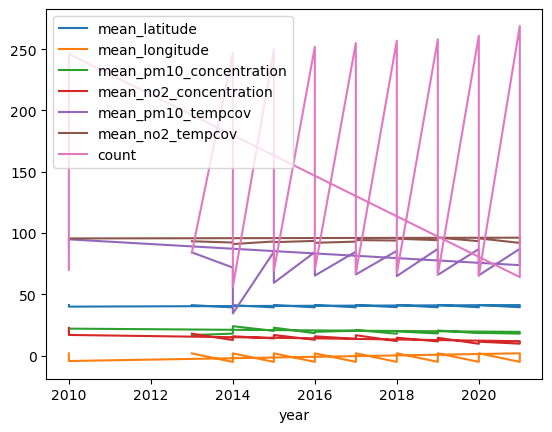

In [54]:
# Plot parties
parties.plot()
 # Adjust the angle as needed

# Beijing Air Qulality Dataset

### Amongst Cluster Correlation analysis

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Put all the above in a function
def timeSeriesAnalysis(dataframe):
    dataframe['timestamp'] = pd.to_datetime(dataframe[['year', 'month', 'day', 'hour']])
    dataframe.set_index('timestamp', inplace=True)
    dataframe.drop(columns=['No','year', 'month', 'day', 'hour', 'wd', 'station'], inplace=True)

    # Find Correlation
    corr = dataframe.corr(method='pearson')
    # Find Seasonality

    # Find Trends
    # Find Anomalies

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title("Feature Correlation Heatmap")
    plt.show()

    return dataframe

In [9]:
df = pd.read_csv("../data/air_quality_cluster/PRSA_Data_Changping_20130301-20170228.csv", sep=",")


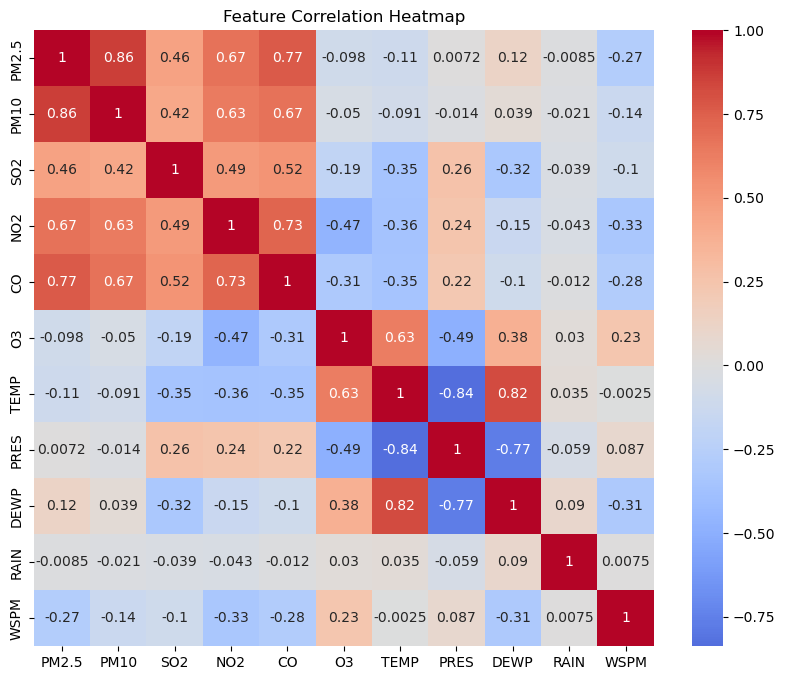

PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  \
timestamp                                                                       
2013-03-01 00:00:00    3.0   6.0  13.0   7.0  300.0  85.0  -2.3  1020.8 -19.7   
2013-03-01 01:00:00    3.0   3.0   6.0   6.0  300.0  85.0  -2.5  1021.3 -19.0   
2013-03-01 02:00:00    3.0   3.0  22.0  13.0  400.0  74.0  -3.0  1021.3 -19.9   
2013-03-01 03:00:00    3.0   6.0  12.0   8.0  300.0  81.0  -3.6  1021.8 -19.1   
2013-03-01 04:00:00    3.0   3.0  14.0   8.0  300.0  81.0  -3.5  1022.3 -19.4   
...                    ...   ...   ...   ...    ...   ...   ...     ...   ...   
2017-02-28 19:00:00   28.0  47.0   4.0  14.0  300.0   NaN  11.7  1008.9 -13.3   
2017-02-28 20:00:00   12.0  12.0   3.0  23.0  500.0  64.0  10.9  1009.0 -14.0   
2017-02-28 21:00:00    7.0  23.0   5.0  17.0  500.0  68.0   9.5  1009.4 -13.0   
2017-02-28 22:00:00   11.0  20.0   3.0  15.0  500.0  72.0   7.8  1009.6 -12.6   
2017-02-28 23:00:00   20.0  25.0   6.0  28.0  900.0  54.0   7.0  1009.4 -12.2   

                     RAIN  WSPM  
timestamp                        
2013-03-01 00:00:00   0.0   0.5  
2013-03-01 01:00:00   0.0   0.7  
2013-03-01 02:00:00   0.0   0.2  
2013-03-01 03:00:00   0.0   1.0  
2013-03-01 04:00:00   0.0   2.1  
...                   ...   ...  
2017-02-28 19:00:00   0.0   1.3  
2017-02-28 20:00:00   0.0   2.1  
2017-02-28 21:00:00   0.0   1.5  
2017-02-28 22:00:00   0.0   1.4  
2017-02-28 23:00:00   0.0   1.9  

[35064 rows x 11 columns]

In [10]:
timeSeriesAnalysis(df)

In [15]:
df = pd.read_csv("../data/air_quality_cluster/PRSA_Data_Aotizhongxin_20130301-20170228.csv", sep=",")

In [17]:
# get nans from all the columns in dataframe to see if there are any
df.shape

(35064, 18)

In [7]:
df_clean  = df.dropna()
df_clean.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

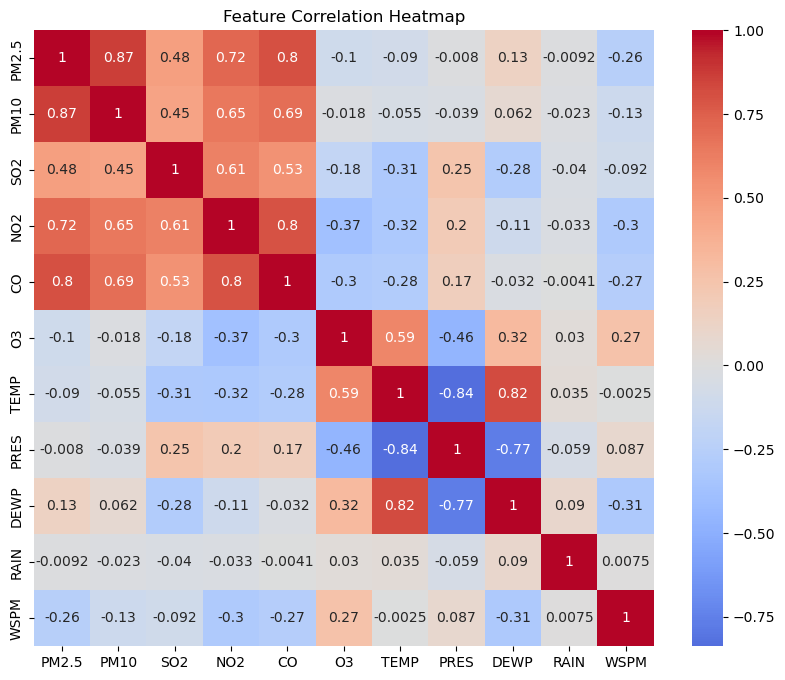

PM2.5  PM10  SO2  NO2     CO     O3  TEMP    PRES  DEWP  \
timestamp                                                                      
2013-03-01 00:00:00    4.0   4.0  3.0  NaN  200.0   82.0  -2.3  1020.8 -19.7   
2013-03-01 01:00:00    7.0   7.0  3.0  NaN  200.0   80.0  -2.5  1021.3 -19.0   
2013-03-01 02:00:00    5.0   5.0  3.0  2.0  200.0   79.0  -3.0  1021.3 -19.9   
2013-03-01 03:00:00    6.0   6.0  3.0  NaN  200.0   79.0  -3.6  1021.8 -19.1   
2013-03-01 04:00:00    5.0   5.0  3.0  NaN  200.0   81.0  -3.5  1022.3 -19.4   
...                    ...   ...  ...  ...    ...    ...   ...     ...   ...   
2017-02-28 19:00:00   11.0  11.0  2.0  2.0  200.0   99.0  11.7  1008.9 -13.3   
2017-02-28 20:00:00   13.0  13.0  2.0  2.0  200.0  101.0  10.9  1009.0 -14.0   
2017-02-28 21:00:00    9.0  14.0  2.0  2.0  200.0  102.0   9.5  1009.4 -13.0   
2017-02-28 22:00:00   10.0  12.0  2.0  2.0  200.0   97.0   7.8  1009.6 -12.6   
2017-02-28 23:00:00   13.0  16.0  4.0  9.0  500.0   74.0   7.0  1009.4 -12.2   

                     RAIN  WSPM  
timestamp                        
2013-03-01 00:00:00   0.0   0.5  
2013-03-01 01:00:00   0.0   0.7  
2013-03-01 02:00:00   0.0   0.2  
2013-03-01 03:00:00   0.0   1.0  
2013-03-01 04:00:00   0.0   2.1  
...                   ...   ...  
2017-02-28 19:00:00   0.0   1.3  
2017-02-28 20:00:00   0.0   2.1  
2017-02-28 21:00:00   0.0   1.5  
2017-02-28 22:00:00   0.0   1.4  
2017-02-28 23:00:00   0.0   1.9  

[35064 rows x 11 columns]

In [12]:
timeSeriesAnalysis(df)

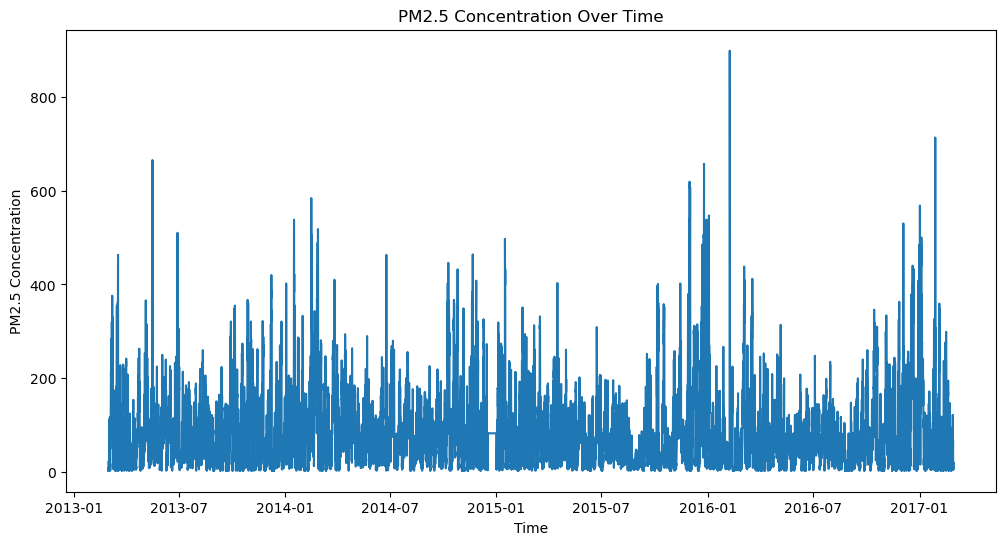

In [132]:
# Plot pm2.5 concentration over time
plt.figure(figsize=(12, 6))
plt.plot(df['PM2.5'])
plt.title("PM2.5 Concentration Over Time")
plt.xlabel("Time")
plt.ylabel("PM2.5 Concentration")
plt.show()

### Time Series Deocomposion

In [62]:
# Decompose time series data into trend, seasonality and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("../data/air_quality_cluster/PRSA_Data_Dingling_20130301-20170228.csv", sep=",")
df['timestamp'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('timestamp', inplace=True)
df.drop(columns=['No','year', 'month', 'day', 'hour', 'wd', 'station'], inplace=True)


In [63]:
# Check for missing values
df.isnull().sum()

# Fill missing values with the mean of the column
df = df.fillna(df.mean())


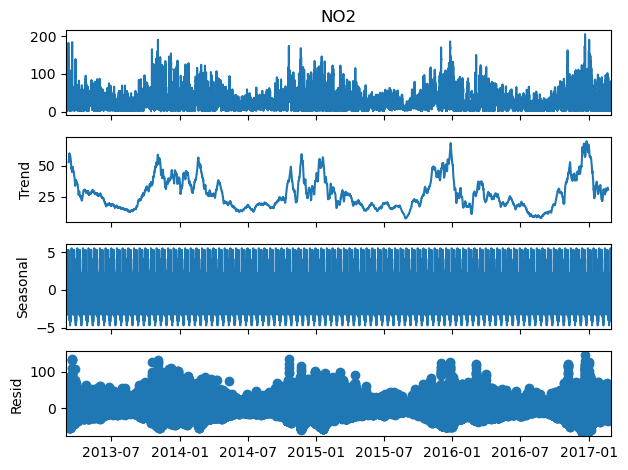

In [64]:
result = seasonal_decompose(df['NO2'], model='additive' , period=365)
result.plot()
plt.show()

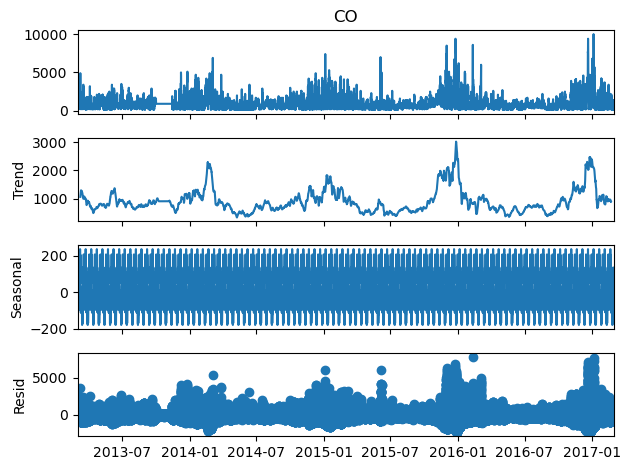

In [65]:
result = seasonal_decompose(df['CO'], model='additive' , period=365)
result.plot()
plt.show()

In [66]:
# Hieratchical TIme Series Forecasting
from hts import HTSRegressor
from hts.hierarchy import HierarchyTree
from hts.utils import load_sample_data

# Load sample data


ModuleNotFoundError: No module named 'hts'

In [122]:
# Create a Mock Time series dataframe, with 69 columns that looks like sensor data and a column called PlateId that has PLATE_ID_1 and PLATE_ID_2 and assing them randomly to rows

import random
import pandas as pd
import numpy as np

np.random.seed(42)

# Create a mock time series data
data = np.random.randint(0, 100, (100, 69))
df = pd.DataFrame(data, columns=[f'Sensor_{i}' for i in range(1, 70)])
df['PlateId'] = np.random.choice(['PLATE_ID_1', 'PLATE_ID_2'], 100)
# Date should be of format 06-Feb-2020 14:59:14
df['Date'] = pd.date_range(start='1/1/2020', periods=100, freq='H')
df.set_index('Date', inplace=True)



/var/folders/n2/ynmqlkx14wd993676tgwybz80000gn/T/ipykernel_49729/2215331256.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Date'] = pd.date_range(start='1/1/2020', periods=100, freq='H')


In [123]:
df

Sensor_1  Sensor_2  Sensor_3  Sensor_4  Sensor_5  \
Date                                                                    
2020-01-01 00:00:00        51        92        14        71        60   
2020-01-01 01:00:00        35        49         3         1         5   
2020-01-01 02:00:00        85        90        34        64        98   
2020-01-01 03:00:00        78        58        31        95        87   
2020-01-01 04:00:00        91        56        88        49        22   
...                       ...       ...       ...       ...       ...   
2020-01-04 23:00:00        12        59        56        85        91   
2020-01-05 00:00:00         3        74        95        48         6   
2020-01-05 01:00:00        60        34         7        23        82   
2020-01-05 02:00:00        14         1        51        43        53   
2020-01-05 03:00:00        92        18        66         7         7   

                     Sensor_6  Sensor_7  Sensor_8  Sensor_9  Sensor_10  ...  \
Date                                                                    ...   
2020-01-01 00:00:00        20        82        86        74         74  ...   
2020-01-01 01:00:00        53         3        53        92         62  ...   
2020-01-01 02:00:00        46        77         2         0          4  ...   
2020-01-01 03:00:00        51        61        57        51         11  ...   
2020-01-01 04:00:00        30        93        41        98          6  ...   
...                       ...       ...       ...       ...        ...  ...   
2020-01-04 23:00:00        51        52        85        42         82  ...   
2020-01-05 00:00:00        10        91        53        86         44  ...   
2020-01-05 01:00:00        35        49        42        26         31  ...   
2020-01-05 02:00:00        17         2         6        42         81  ...   
2020-01-05 03:00:00        83        46         3        50         84  ...   

                     Sensor_61  Sensor_62  Sensor_63  Sensor_64  Sensor_65  \
Date                                                                         
2020-01-01 00:00:00         91         59         70         43          7   
2020-01-01 01:00:00         33         32         47         22         61   
2020-01-01 02:00:00         71         26          8         61         36   
2020-01-01 03:00:00         95         70         51         32         39   
2020-01-01 04:00:00         16         32         47         75         58   
...                        ...        ...        ...        ...        ...   
2020-01-04 23:00:00         36         45         52         87         79   
2020-01-05 00:00:00          3         42         89          3          0   
2020-01-05 01:00:00         93         26         38          8         20   
2020-01-05 02:00:00          9         91         28         78         34   
2020-01-05 03:00:00         56         91         50         55         26   

                     Sensor_66  Sensor_67  Sensor_68  Sensor_69     PlateId  
Date                                                                         
2020-01-01 00:00:00         46         34         77         80  PLATE_ID_2  
2020-01-01 01:00:00         87         36         98         43  PLATE_ID_1  
2020-01-01 02:00:00         96         50         43         23  PLATE_ID_2  
2020-01-01 03:00:00         38         81          0         10  PLATE_ID_2  
2020-01-01 04:00:00         85         21         29         37  PLATE_ID_1  
...                        ...        ...        ...        ...         ...  
2020-01-04 23:00:00         12         88         53         56  PLATE_ID_2  
2020-01-05 00:00:00         70         93         49         72  PLATE_ID_1  
2020-01-05 01:00:00         75         28         32         61  PLATE_ID_2  
2020-01-05 02:00:00          5         11         37         76  PLATE_ID_2  
2020-01-05 03:00:00         31          8         95         83  PLATE_ID_2  

[100 rows x 7

In [125]:
# Group by PlateId
grouped = df.groupby('PlateId')
# Show the first 5 rows of each group
for name, group in grouped:
    print(name)
    print(group.head())

PLATE_ID_1
                     Sensor_1  Sensor_2  Sensor_3  Sensor_4  Sensor_5  \
Date                                                                    
2020-01-01 01:00:00        35        49         3         1         5   
2020-01-01 04:00:00        91        56        88        49        22   
2020-01-01 07:00:00        11         0        57         0        33   
2020-01-01 14:00:00        87         1        25        13        58   
2020-01-01 16:00:00        61        59        49        77        74   

                     Sensor_6  Sensor_7  Sensor_8  Sensor_9  Sensor_10  ...  \
Date                                                                    ...   
2020-01-01 01:00:00        53         3        53        92         62  ...   
2020-01-01 04:00:00        30        93        41        98          6  ...   
2020-01-01 07:00:00        95        47        88         0         15  ...   
2020-01-01 14:00:00        55         6         2        22         17  ...   
202

In [ ]:
# Convert the time column time in format 06-Feb-2020 14:59:14 to 2020-02-06 14:59:14
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')


# Create a dataframe that is corresponding to PlateId 1 and has 69 columns but no Plate Id column and has sensor data
df_plate_id_1 = df[df['PlateId'] == 'PLATE_ID_1']
df_plate_id_1 = df_plate_id_1.drop(columns=['PlateId'])
df_plate_id_1

# Create a dataframe that is corresponding to PlateId 2 and has 69 columns but no Plate Id column and has sensor data
df_plate_id_2 = df[df['PlateId'] == 'PLATE_ID_2']
df_plate_id_2 = df_plate_id_2.drop(columns=['PlateId'])
df_plate_id_2

# code to merge df_plate_id_1 with df based on the plate_id in df and date in df and date in df_plate_id_1
df_plate_id_1 = df_plate_id_1.reset_index()
df_plate_id_1['Date'] = pd.to_datetime(df_plate_id_1['Date'])
df_plate_id_1.set_index('Date', inplace=True)

df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df_merged = df.merge(df_plate_id_1, on='Date', how='left')


# Plot with time on x-axis and sensor datas on y-axis explicity defining the x and y axis
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df_merged.index, df_merged['Sensor_1'], label='Sensor 1')



In [ ]:
# NORMALIZE DATA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_merged)
df_normalized = pd.DataFrame(df_normalized, columns=df_merged.columns, index=df_merged.index)
df_normalized

# Unnormalize data
df_unnormalized = scaler.inverse_transform(df_normalized)
df_unnormalized = pd.DataFrame(df_unnormalized, columns=df_normalized.columns, index=df_normalized.index)
df_unnormalized

# Plot all columns separately to see time series
for col in df_normalized.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df_normalized[col])
    plt.title(col)
    plt.show()

# I have 155 columns, plot them in 10 columns per plot
for i in range(0, 155, 10):
    plt.figure(figsize=(10, 6))
    for col in df_normalized.columns[i:i+10]:
        plt.plot(df_normalized[col])
    plt.title(f'Columns {i} to {i+10}')
    plt.show()
    # Set legend is true
    plt.legend(df_normalized.columns[i:i+10])



    

# Time Series Analysis on Public Data

## TODOS

1. Check if Time series is Stationary using ADF test
2. Test for Granger Causality.

In [67]:
# Import Aotizhongxin data
df = pd.read_csv("../data/air_quality_cluster/PRSA_Data_Aotizhongxin_20130301-20170228.csv", sep=",")
# Import Changping data
df_changping = pd.read_csv("../data/air_quality_cluster/PRSA_Data_Changping_20130301-20170228.csv", sep=",")

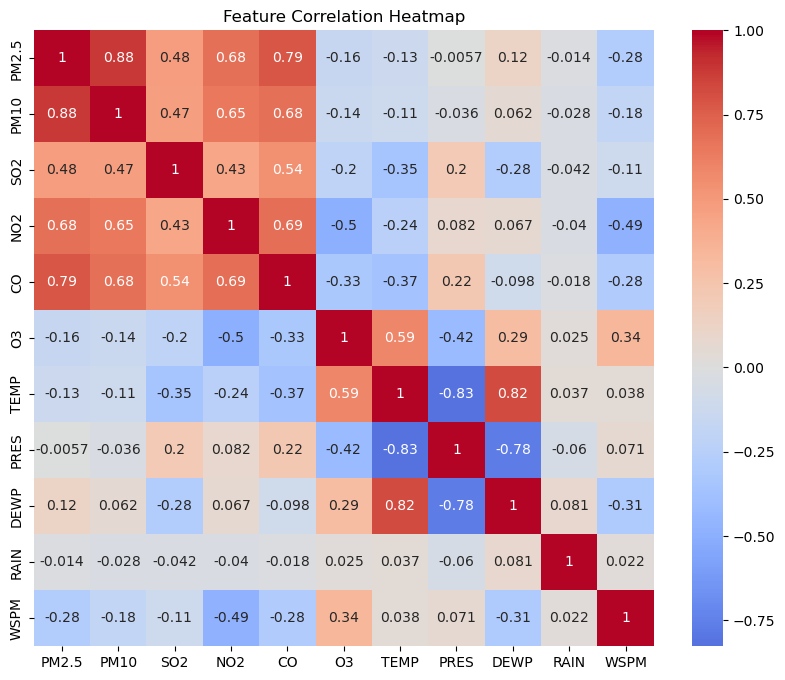

In [68]:
df = timeSeriesAnalysis(df)

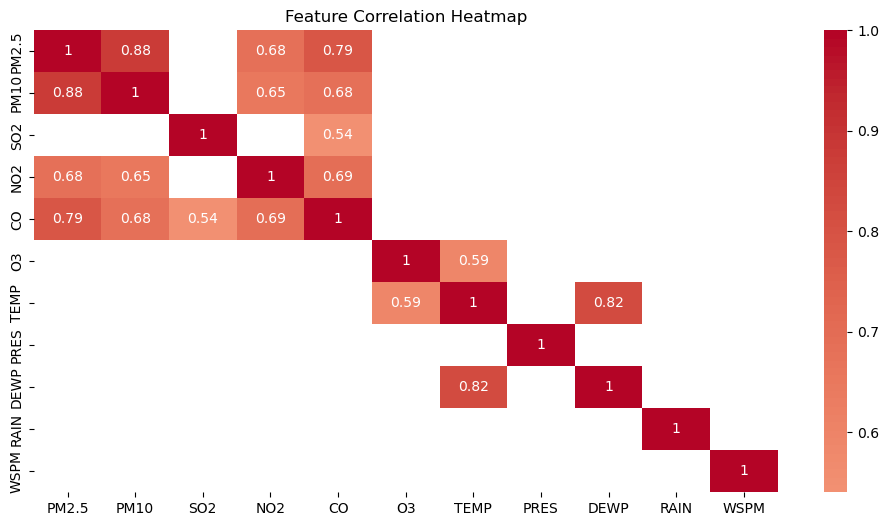

In [69]:
# Do a correlation analysis for df and show only highly correlated features as heatmap
corr = df.corr()
corr = corr[corr > 0.5]
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


In [70]:
# Check for missing values in No2 so that I can perform ADF test
df.isnull().sum()
# df.drop(columns=['No', 'year', 'month', 'day', 'hour', 'wd', 'station'], inplace=True)

# Fill missing values with the mean of the column
df = df.fillna(df.mean())


ADF Statistic: -5.746423
p-value: 0.000001
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


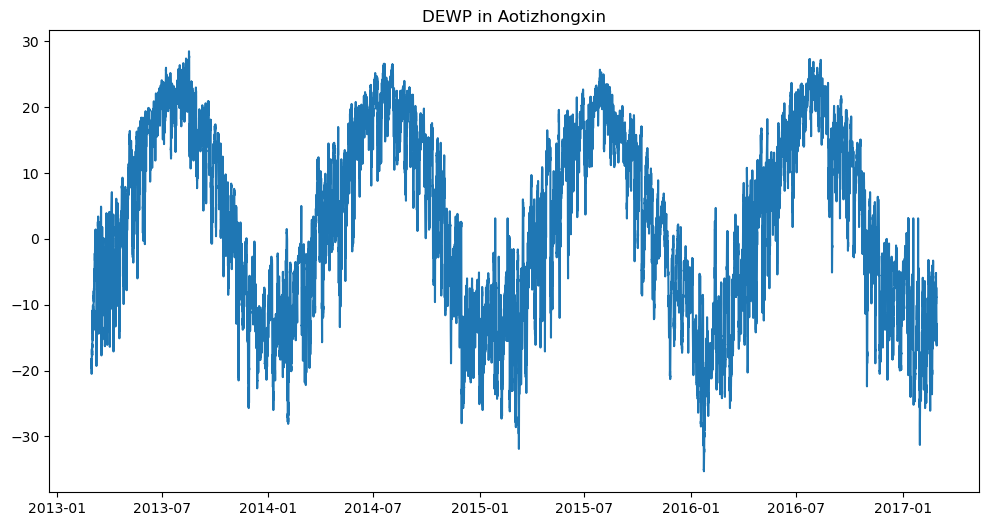

In [71]:
# DO ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['DEWP'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['DEWP'])
plt.title("DEWP in Aotizhongxin")
plt.show() 

ADF Statistic: -16.501766
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


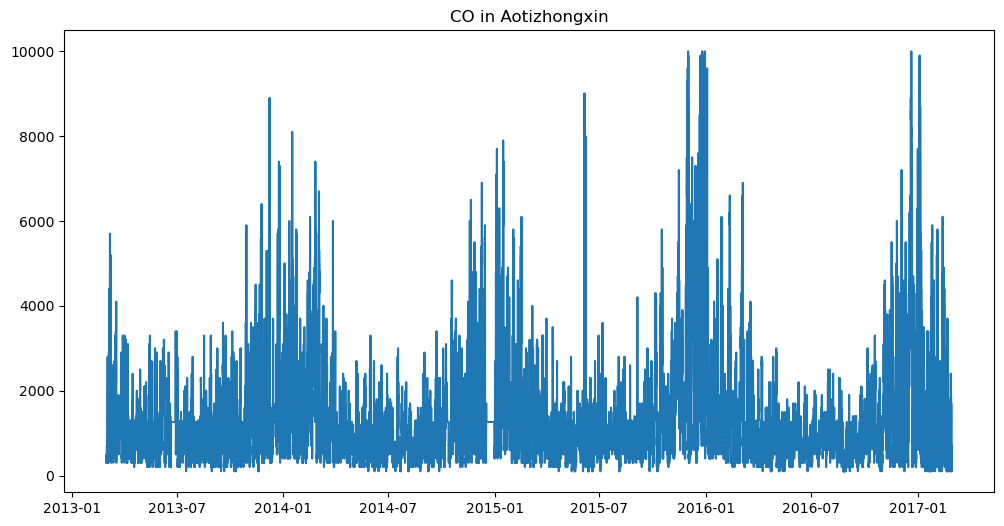

In [72]:
# DO ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['CO'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['CO'])
plt.title("CO in Aotizhongxin")
plt.show() 

# Do KPSS Test
# from statsmodels.tsa.stattools import kpss
# result = kpss(df['DEWP'])
# print('KPSS Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
# print('Critical Values:')
# for key, value in result[3].items():
#     print('\t%s: %.3f' % (key, value))

# Decompose time series data into trend, seasonality and residuals


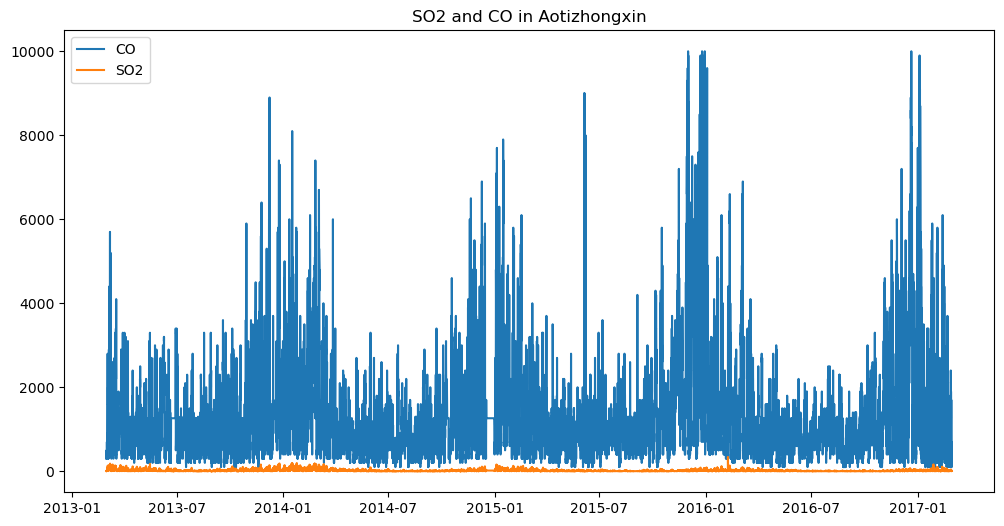

In [73]:
# plot aoitzhongxin data of NO2 and Changping data of NO2 on the same plot
plt.figure(figsize=(12, 6))
plt.plot(df['CO'], label='CO')
# plt.plot(df_changping['DEWP'], label='Changping')
plt.plot(df['SO2'], label='SO2')
plt.title("SO2 and CO in Aotizhongxin")
plt.legend()
plt.show()

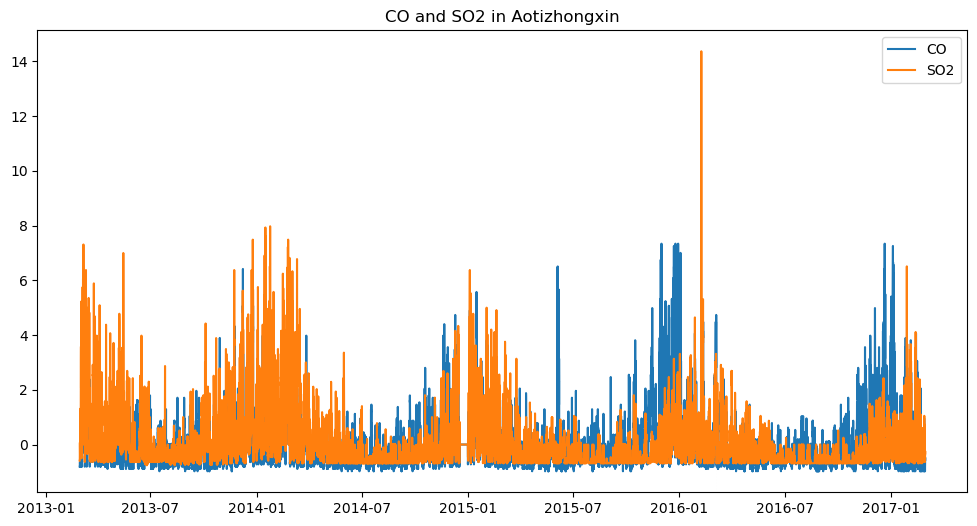

In [74]:
# Z normalization of CO and SO2 data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['CO'] = scaler.fit_transform(df[['CO']])
df['SO2'] = scaler.fit_transform(df[['SO2']])

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['CO'], label='CO')
plt.plot(df['SO2'], label='SO2')
plt.title("CO and SO2 in Aotizhongxin")
plt.legend()
plt.show()

In [75]:
df.head()

PM2.5  PM10       SO2   NO2        CO    O3  TEMP  \
timestamp                                                                
2013-03-01 00:00:00    4.0   4.0 -0.594053   7.0 -0.809141  77.0  -0.7   
2013-03-01 01:00:00    8.0   8.0 -0.594053   7.0 -0.809141  77.0  -1.1   
2013-03-01 02:00:00    7.0   7.0 -0.549641  10.0 -0.809141  73.0  -1.1   
2013-03-01 03:00:00    6.0   6.0 -0.283168  11.0 -0.809141  72.0  -1.4   
2013-03-01 04:00:00    3.0   3.0 -0.238756  12.0 -0.809141  72.0  -2.0   

                       PRES  DEWP  RAIN  WSPM  
timestamp                                      
2013-03-01 00:00:00  1023.0 -18.8   0.0   4.4  
2013-03-01 01:00:00  1023.2 -18.2   0.0   4.7  
2013-03-01 02:00:00  1023.5 -18.2   0.0   5.6  
2013-03-01 03:00:00  1024.5 -19.4   0.0   3.1  
2013-03-01 04:00:00  1025.2 -19.5   0.0   2.0

<Figure size 1200x600 with 0 Axes>

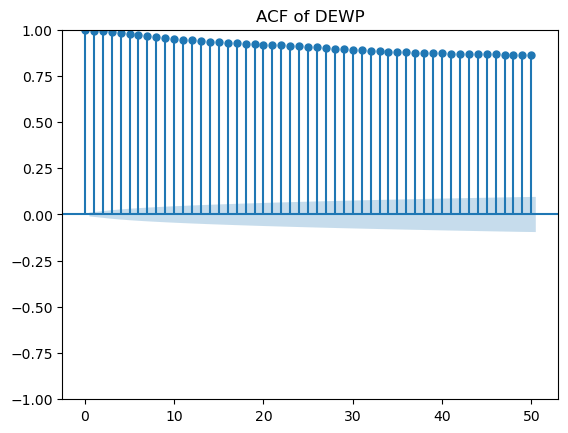

In [76]:
# Plot PACF and ACF with normalized data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))

plot_acf(df['DEWP'], lags=50, title='ACF of DEWP')
plt.show()


<Figure size 1200x600 with 0 Axes>

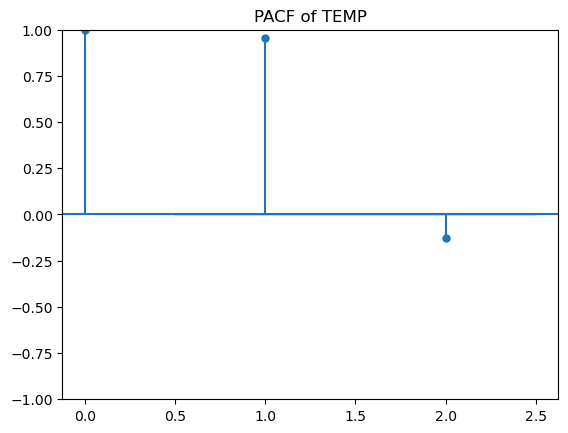

In [77]:
plt.figure(figsize=(12, 6))
plot_pacf(df['SO2'], lags=2, title='PACF of TEMP')
plt.show()

In [78]:
# Setup VAR Model
from statsmodels.tsa.api import VAR

# Define the number of lags
model = VAR(df[['DEWP', 'TEMP']])
for i in range(1, 100):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  1.0255377136128683
HQIC:  1.0259990638560694 

Lag Order = 2
AIC :  0.7118650046975213
HQIC:  0.7126339421451446 

Lag Order = 3
AIC :  0.6763845282102824
HQIC:  0.6774610691643841 

Lag Order = 4
AIC :  0.6676650761876579
HQIC:  0.6690492369516311 

Lag Order = 5
AIC :  0.6658312022289894
HQIC:  0.6675229991075637 

Lag Order = 6
AIC :  0.6644912136193178
HQIC:  0.66649066291856 

Lag Order = 7
AIC :  0.6576534526488663
HQIC:  0.6599605706761801 

Lag Order = 8
AIC :  0.6514228490096077
HQIC:  0.6540376520737338 

Lag Order = 9
AIC :  0.6441400183303476
HQIC:  0.6470625227413646 

Lag Order = 10
AIC :  0.6368933122107647
HQIC:  0.6401235342800883 

Lag Order = 11
AIC :  0.6332805005037793
HQIC:  0.6368184565441629 

Lag Order = 12
AIC :  0.6237996101852069
HQIC:  0.627645316510742 

Lag Order = 13
AIC :  0.6161656635217782
HQIC:  0.6203191364478938 

Lag Order = 14
AIC :  0.6008534720741605
HQIC:  0.6053147279176242 

Lag Order = 15
AIC :  0.5840939772789214
HQIC:

In [79]:
# Lets use Lag Order 25
result = model.fit(25)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Nov, 2024
Time:                     15:47:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.476925
Nobs:                     35039.0    HQIC:                  0.460134
Log likelihood:          -107258.    FPE:                    1.57190
AIC:                     0.452286    Det(Omega_mle):         1.56734
--------------------------------------------------------------------
Results for equation DEWP
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -0.247733         0.018409          -13.458           0.000
L1.DEWP          0.987391         0.005401          182.818           0.000
L1.TEMP         -0.156606         0.006782          -23.090           0.000
L2.DE

In [80]:
# Granger Test
from statsmodels.tsa.stattools import grangercausalitytests
max_lag = 25

granger_test = grangercausalitytests(df[['TEMP', 'NO2']], max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=28.9542 , p=0.0000  , df_denom=35060, df_num=1
ssr based chi2 test:   chi2=28.9567 , p=0.0000  , df=1
likelihood ratio test: chi2=28.9447 , p=0.0000  , df=1
parameter F test:         F=28.9542 , p=0.0000  , df_denom=35060, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=51.8261 , p=0.0000  , df_denom=35057, df_num=2
ssr based chi2 test:   chi2=103.6669, p=0.0000  , df=2
likelihood ratio test: chi2=103.5140, p=0.0000  , df=2
parameter F test:         F=51.8261 , p=0.0000  , df_denom=35057, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=33.6109 , p=0.0000  , df_denom=35054, df_num=3
ssr based chi2 test:   chi2=100.8530, p=0.0000  , df=3
likelihood ratio test: chi2=100.7082, p=0.0000  , df=3
parameter F test:         F=33.6109 , p=0.0000  , df_denom=35054, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=31.4739 

### Time Series Handbook Granger Test

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests
import warnings
warnings.filterwarnings("ignore")

In [82]:
# get only CO and SO2 data from df and drop the rest
# df = df[['CO', 'SO2']]
# Check for missing values
df.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

In [83]:
# Put ADF and KPSS test in a function
def check_stationarity(data, column_name):
    # Add column name to the print statement
    print(f"Stationarity test for {column_name}")
    result = adfuller(data)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    result = kpss(data)
    print('KPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print('\t%s: %.3f' % (key, value))

KPSS suggests CO and SO2 is not stationary.

### Checking Lag Plot

In [84]:
def lag_plots(data_df):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    lag_plot(data_df[data_df.columns[0]], ax=ax1)
    ax1.set_title(data_df.columns[0]);

    lag_plot(data_df[data_df.columns[1]], ax=ax2)
    ax2.set_title(data_df.columns[1]);

    ax1.set_ylabel('$y_{t+1}$');
    ax1.set_xlabel('$y_t$');
    ax2.set_ylabel('$y_{t+1}$');
    ax2.set_xlabel('$y_t$');

    plt.tight_layout()

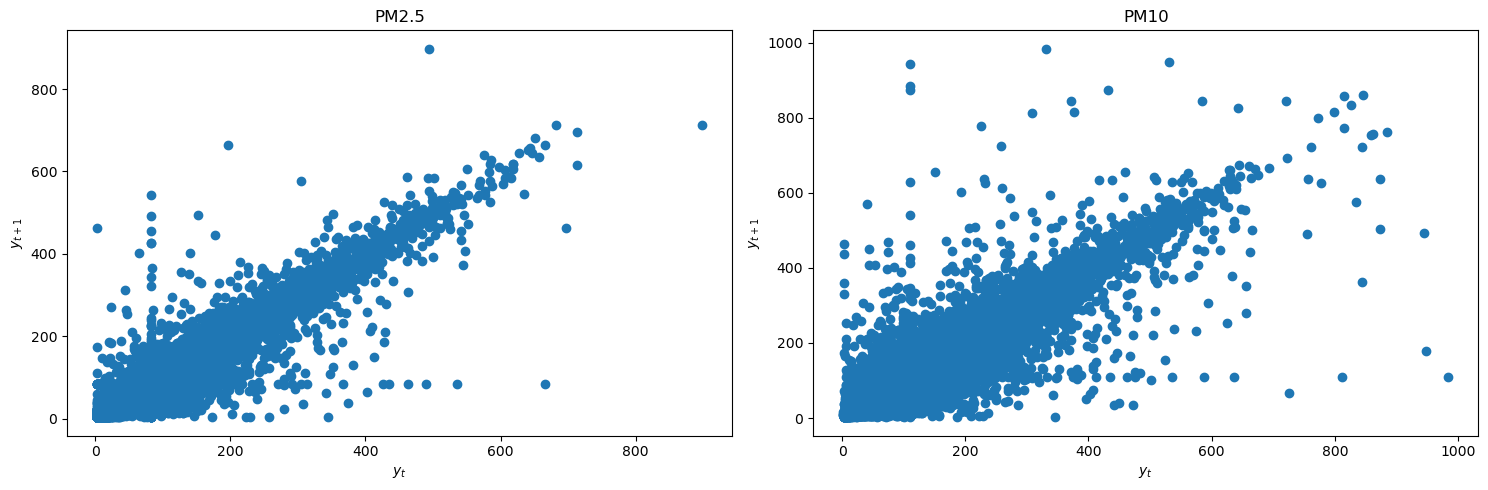

In [85]:
lag_plots(df)

In [86]:
# First diff for CO only and keep the rest as is
df['CO_diff'] = df['CO'].diff()
df['SO2_diff'] = df['SO2'].diff()
df['CO_diff'].dropna(inplace=True)


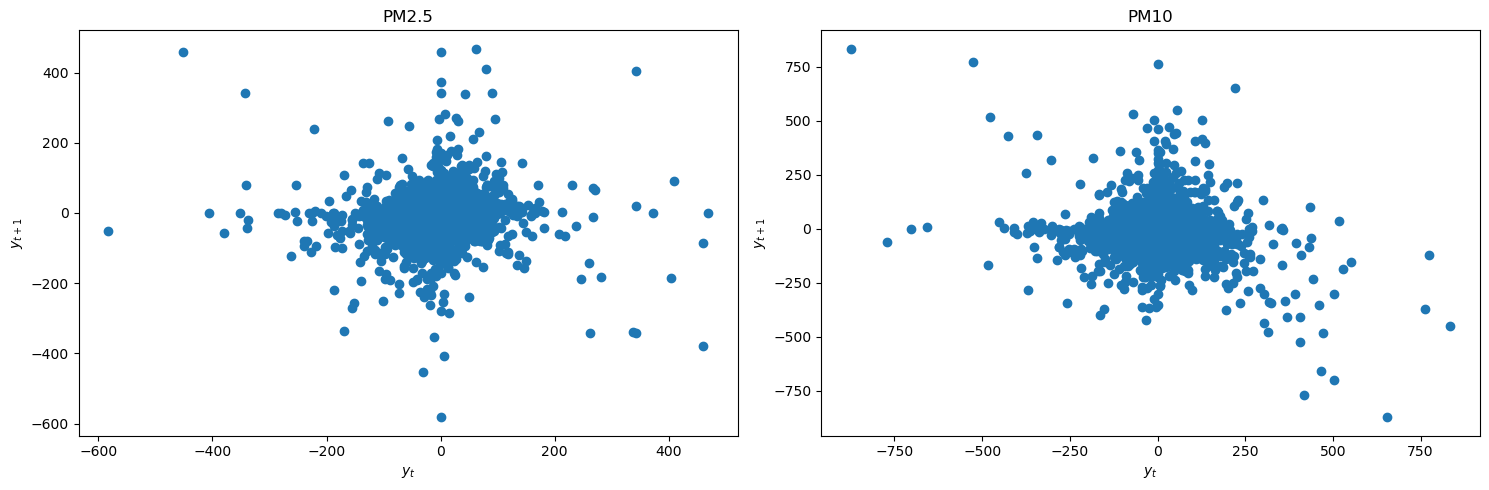

In [87]:
# First Difference for CO and SO2
df_diff = df.diff().dropna()
lag_plots(df_diff)

In [88]:
# check_stationarity(df_diff['SO2'])
# Check for stationarity for all columns
for column in df_diff.columns:
    check_stationarity(df_diff[column], column)


Stationarity test for PM2.5
ADF Statistic: -33.865993
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
KPSS Statistic: 0.002963
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Stationarity test for PM10
ADF Statistic: -40.346594
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
KPSS Statistic: 0.004581
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Stationarity test for SO2
ADF Statistic: -35.791387
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
KPSS Statistic: 0.006129
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Stationarity test for NO2
ADF Statistic: -36.880105
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
KPSS Statistic: 0.005658
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Stationarity test for CO
ADF Statistic: -33.620633
p-value: 0.000000
Crit

KeyboardInterrupt: 

In [89]:
# Setting up VAR Model

def split_data(data, split_ratio=0.8):
    train_size = int(len(data) * split_ratio)
    train, test = data[0:train_size], data[train_size:]
    return train, test

In [90]:
train, test = split_data(df_diff)

In [94]:
def select_p(train_df):
    aic, bic, fpe, hqic = [], [], [], []
    model = VAR(train_df) 
    p = np.arange(1,60)
    for i in p:
        result = model.fit(i)
        aic.append(result.aic)
        bic.append(result.bic)
        fpe.append(result.fpe)
        hqic.append(result.hqic)
    lags_metrics_df = pd.DataFrame({'AIC': aic, 
                                    'BIC': bic, 
                                    'HQIC': hqic,
                                    'FPE': fpe}, 
                                   index=p)    
    fig, ax = plt.subplots(1, 4, figsize=(15, 3), sharex=True)
    lags_metrics_df.plot(subplots=True, ax=ax, marker='o')
    plt.tight_layout()
    print(lags_metrics_df.idxmin(axis=0))

In [95]:
select_p(train)


LinAlgError: 12-th leading minor of the array is not positive definite

BIC is lowest at 23.

In [99]:
p = 20
model = VAR(train)
var_model = model.fit(p)

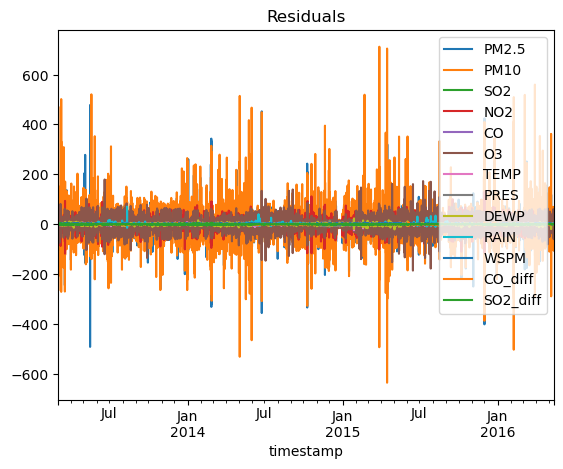

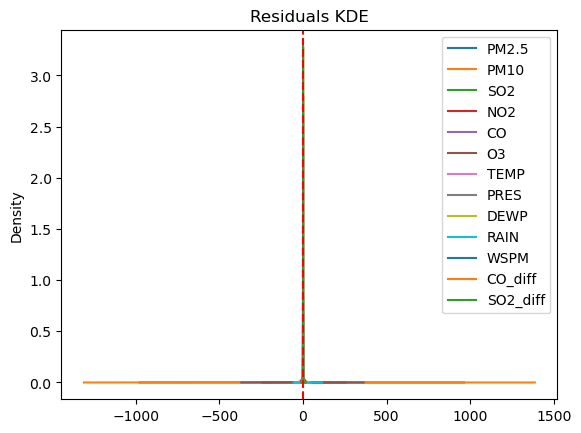

In [100]:
# Residual Analysis
residuals = var_model.resid
residuals.plot(title="Residuals")
residuals.plot(kind='kde', title='Residuals KDE')
# Plot a line at 0
plt.axvline(0, color='red', linestyle='--')
plt.show()

In [101]:
def granger_causation_matrix(data, variables, p, test = 'ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the time series.
    The rows are the response variables, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], p, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(p)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [102]:
granger_causation_matrix(train, train.columns, p)

PM2.5_x  PM10_x   SO2_x   NO2_x    CO_x  O3_x  TEMP_x  PRES_x  \
PM2.5_y         1.0     0.0  0.0000  0.0000  0.0000   0.0     0.0  0.0000   
PM10_y          0.0     1.0  0.0000  0.0000  0.0000   0.0     0.0  0.0000   
SO2_y           0.0     0.0  1.0000  0.0000  0.0000   0.0     0.0  0.0000   
NO2_y           0.0     0.0  0.0000  1.0000  0.0000   0.0     0.0  0.0000   
CO_y            0.0     0.0  0.0000  0.0000  1.0000   0.0     0.0  0.0000   
O3_y            0.0     0.0  0.0000  0.0000  0.0000   1.0     0.0  0.0000   
TEMP_y          0.0     0.0  0.0000  0.0000  0.0000   0.0     1.0  0.0000   
PRES_y          0.0     0.0  0.0000  0.0000  0.0000   0.0     0.0  1.0000   
DEWP_y          0.0     0.0  0.0000  0.0000  0.0000   0.0     0.0  0.0000   
RAIN_y          0.0     0.0  0.6293  0.6092  0.0845   0.0     0.0  0.0049   
WSPM_y          0.0     0.0  0.0000  0.0000  0.0000   0.0     0.0  0.0000   
CO_diff_y       0.0     0.0  0.0000  0.0000  0.0000   0.0     0.0  0.0000   
SO2_diff_y      0.0     0.0  0.0000  0.0000  0.0000   0.0     0.0  0.0000   

            DEWP_x  RAIN_x  WSPM_x  CO_diff_x  SO2_diff_x  
PM2.5_y     0.0000  0.0000     0.0     0.0000      0.0000  
PM10_y      0.0000  0.0000     0.0     0.0000      0.0000  
SO2_y       0.0000  0.4808     0.0     0.0000      0.0000  
NO2_y       0.0000  0.0078     0.0     0.0000      0.0000  
CO_y        0.0000  0.2276     0.0     0.0000      0.0000  
O3_y        0.0000  0.0003     0.0     0.0000      0.0000  
TEMP_y      0.0000  0.0000     0.0     0.0000      0.0000  
PRES_y      0.0000  0.6684     0.0     0.0000      0.0000  
DEWP_y      1.0000  0.6182     0.0     0.0001      0.0669  
RAIN_y      0.1727  1.0000     0.0     0.4928      0.8298  
WSPM_y      0.0000  0.0000     1.0     0.0000      0.0068  
CO_diff_y   0.0000  0.0864     0.0     1.0000      0.0000  
SO2_diff_y  0.0000  0.4936     0.0     0.0000      1.0000

## CCM Tests

In [109]:
# Use Convergent Cross Mapping to check for causality using causal-ccm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from causal_ccm.causal_ccm import ccm
from tqdm import tqdm

### Just to remove warnings to prettify the notebook. 
import warnings
warnings.filterwarnings("ignore")


In [114]:
def viz_ccm(func, X, Y, L_range, tau, E):
    Xhat_My, Yhat_Mx = [], [] # correlation list
    for L in tqdm(L_range): 
        ccm_XY = func(X, Y, tau, E, L) # define new ccm object # Testing for X -> Y
        ccm_YX = func(Y, X, tau, E, L) # define new ccm object # Testing for Y -> X    

        # lowest value must be 0 -- following the process of the original paper
        # implement this in the package as an option
        rho_xy = np.max([0, ccm_XY.causality()[0]])
        rho_yx = np.max([0, ccm_YX.causality()[0]])

        Xhat_My.append(rho_xy) 
        Yhat_Mx.append(rho_yx) 
    
    print('X->Y r', np.round(Xhat_My[-1], 2), 'p value', np.round(ccm_XY.causality()[1], 4))
    print('Y->X r', np.round(Yhat_Mx[-1], 2), 'p value', np.round(ccm_YX.causality()[1], 4))

    # plot convergence as L->inf. Convergence is necessary to conclude causality
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    ax.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$', linewidth=2)
    ax.plot(L_range, Yhat_Mx, c='r', label='$\hat{Y}(t)|M_x$', linewidth=2)
    ax.set_xlabel('L', size=15)
    ax.set_ylabel('correl', size=15)
    ax.legend(prop={'size': 20})  
    
    return ax

In [111]:
# Example usage
'''
# checking convergence
# Looking at "convergence"
L_range = range(20, t, 50) # L values to test
tau = 1
E = 2

ax = viz_ccm(ccm, X, Y, L_range, tau, E)
'''

'\n# checking convergence\n# Looking at "convergence"\nL_range = range(20, t, 50) # L values to test\ntau = 1\nE = 2\n\nax = viz_ccm(ccm, X, Y, L_range, tau, E)\n'

In [112]:
# CCM for all columns pair
def ccm_all_columns(data, tau, E, L_range):
    for column in data.columns:
        for column_2 in data.columns:
            if column != column_2:
                print(f"Checking CCM for {column} and {column_2}")
                X = data[column].values
                Y = data[column_2].values
                ax = viz_ccm(ccm, X, Y, L_range, tau, E)
                plt.title(f"CCM for {column} and {column_2}")
                plt.show()

Checking CCM for PM2.5 and PM10


100%|██████████| 2/2 [00:00<00:00, 136.75it/s]


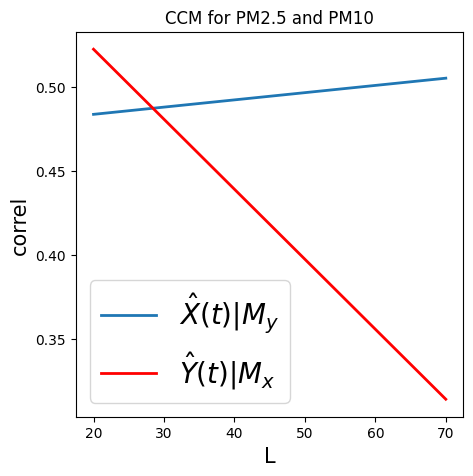

Checking CCM for PM2.5 and SO2


100%|██████████| 2/2 [00:00<00:00, 184.96it/s]


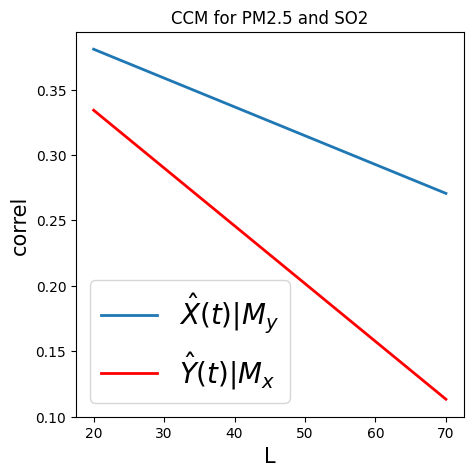

Checking CCM for PM2.5 and NO2


100%|██████████| 2/2 [00:00<00:00, 199.22it/s]


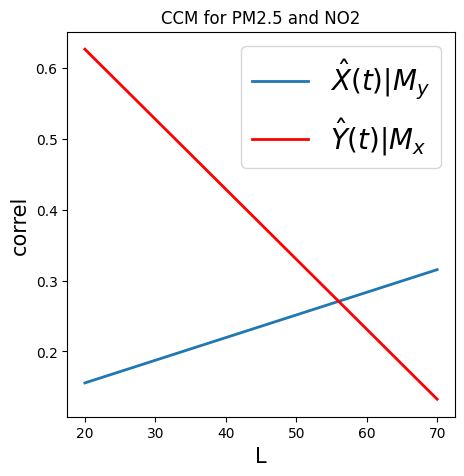

Checking CCM for PM2.5 and CO


100%|██████████| 2/2 [00:00<00:00, 193.91it/s]


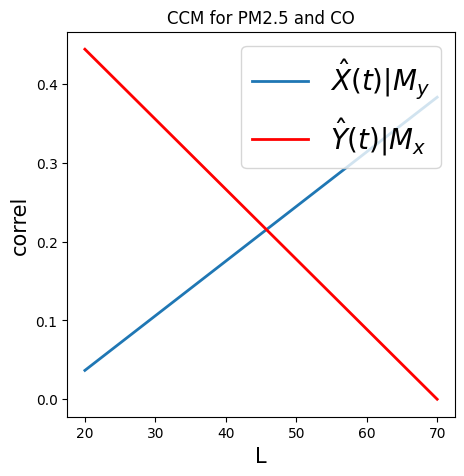

Checking CCM for PM2.5 and O3


100%|██████████| 2/2 [00:00<00:00, 193.65it/s]


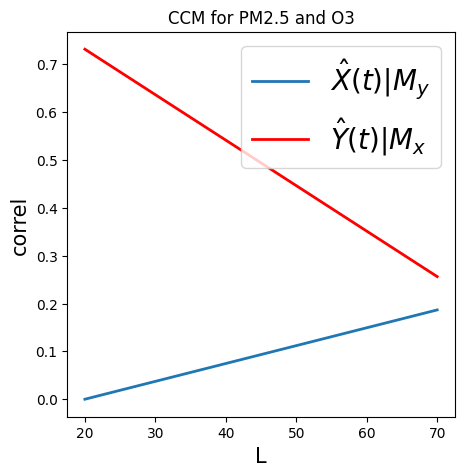

Checking CCM for PM2.5 and TEMP


100%|██████████| 2/2 [00:00<00:00, 186.12it/s]


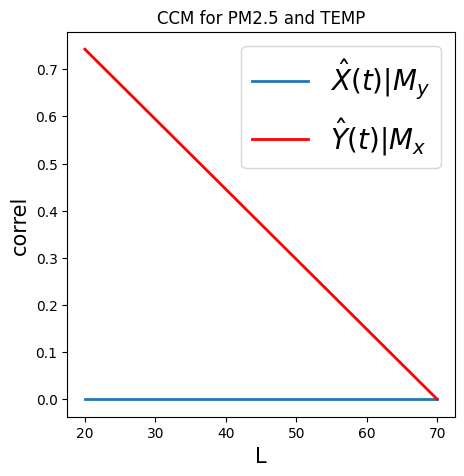

Checking CCM for PM2.5 and PRES


100%|██████████| 2/2 [00:00<00:00, 197.91it/s]


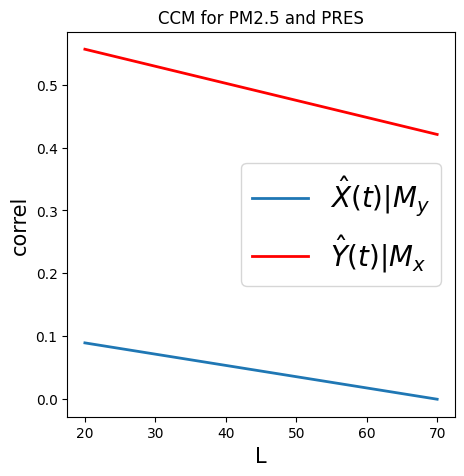

Checking CCM for PM2.5 and DEWP


100%|██████████| 2/2 [00:00<00:00, 194.42it/s]


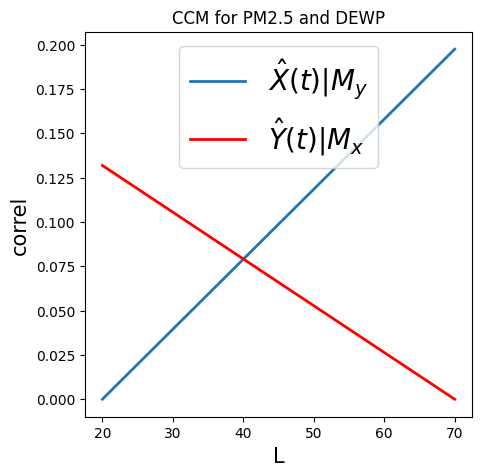

Checking CCM for PM2.5 and RAIN


100%|██████████| 2/2 [00:00<00:00, 221.03it/s]


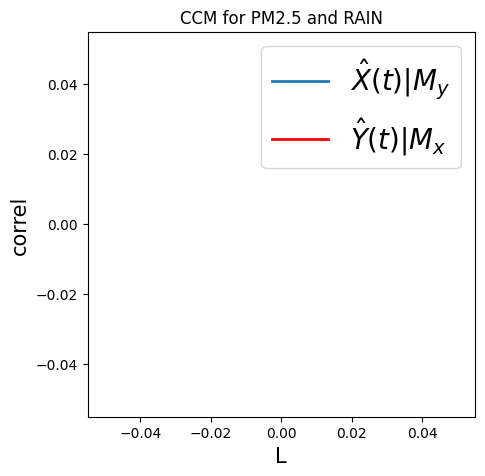

Checking CCM for PM2.5 and WSPM


100%|██████████| 2/2 [00:00<00:00, 228.08it/s]


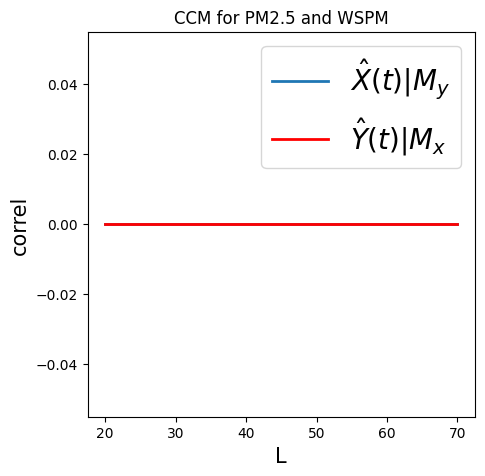

Checking CCM for PM10 and PM2.5


100%|██████████| 2/2 [00:00<00:00, 196.17it/s]


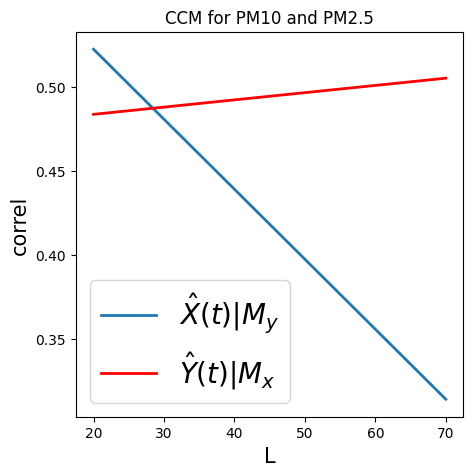

Checking CCM for PM10 and SO2


100%|██████████| 2/2 [00:00<00:00, 127.66it/s]


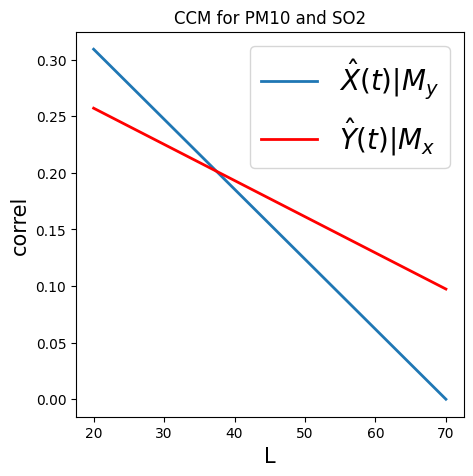

Checking CCM for PM10 and NO2


100%|██████████| 2/2 [00:00<00:00, 193.75it/s]


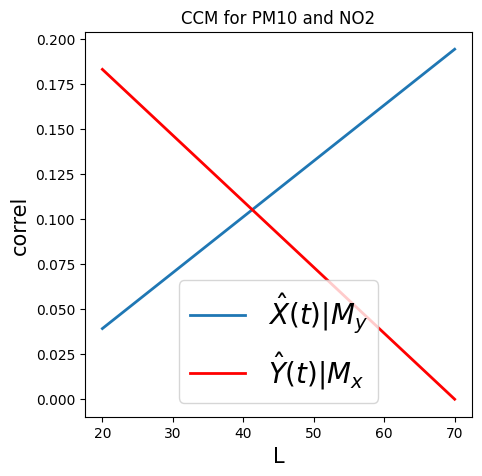

Checking CCM for PM10 and CO


100%|██████████| 2/2 [00:00<00:00, 190.43it/s]


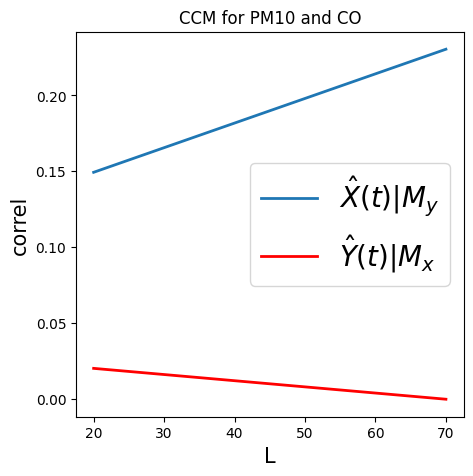

Checking CCM for PM10 and O3


100%|██████████| 2/2 [00:00<00:00, 191.40it/s]


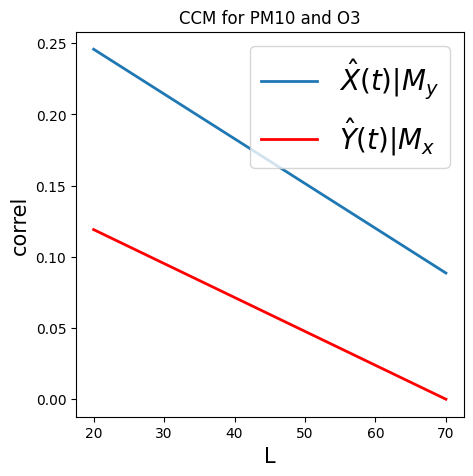

Checking CCM for PM10 and TEMP


100%|██████████| 2/2 [00:00<00:00, 193.57it/s]


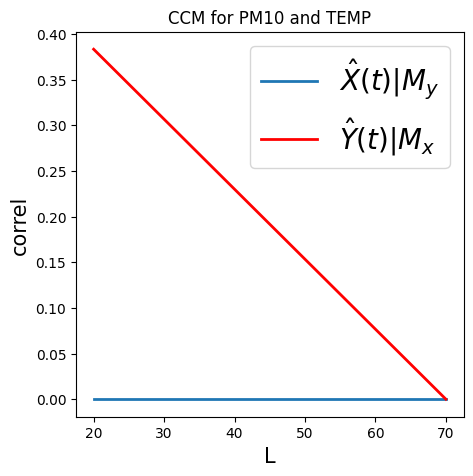

Checking CCM for PM10 and PRES


100%|██████████| 2/2 [00:00<00:00, 193.93it/s]


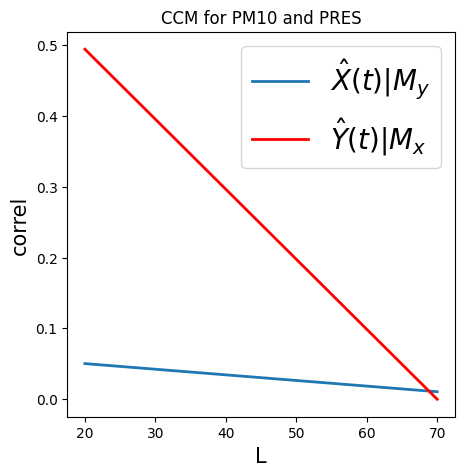

Checking CCM for PM10 and DEWP


100%|██████████| 2/2 [00:00<00:00, 193.27it/s]


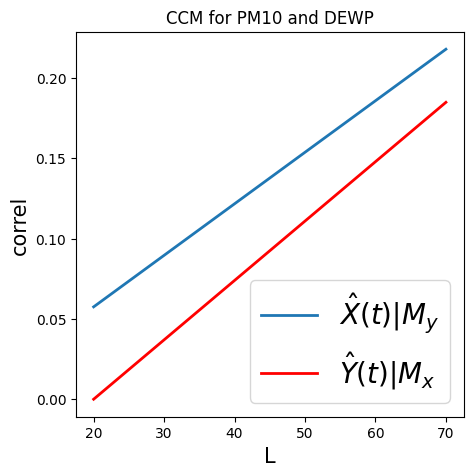

Checking CCM for PM10 and RAIN


100%|██████████| 2/2 [00:00<00:00, 243.35it/s]


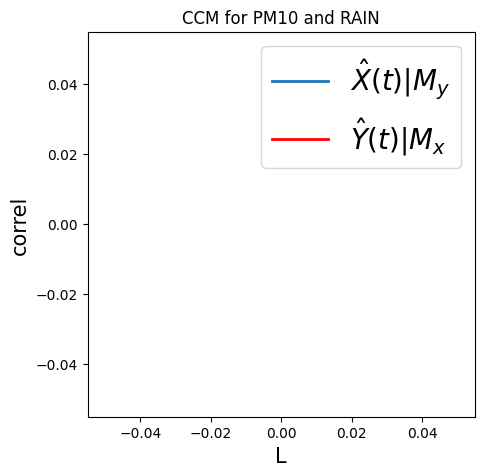

Checking CCM for PM10 and WSPM


100%|██████████| 2/2 [00:00<00:00, 235.71it/s]


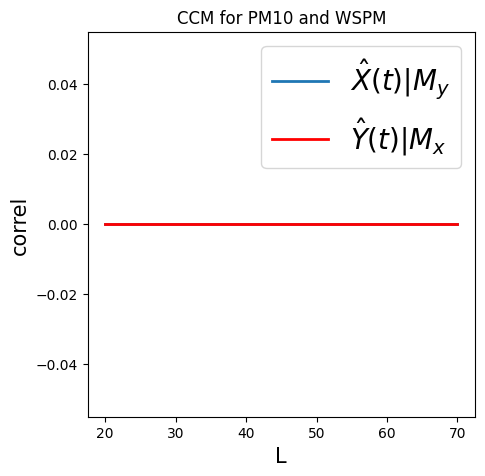

Checking CCM for SO2 and PM2.5


100%|██████████| 2/2 [00:00<00:00, 201.32it/s]


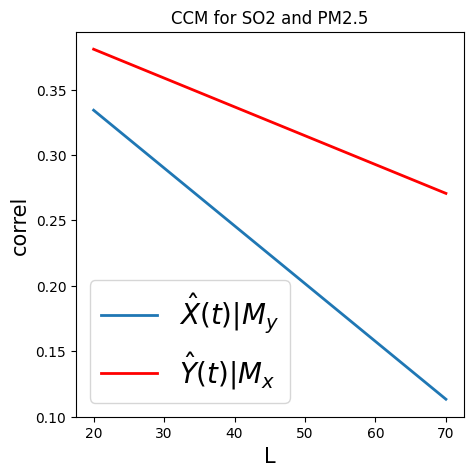

Checking CCM for SO2 and PM10


100%|██████████| 2/2 [00:00<00:00, 187.97it/s]


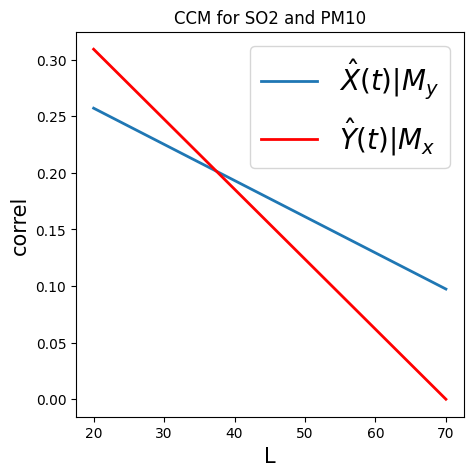

Checking CCM for SO2 and NO2


100%|██████████| 2/2 [00:00<00:00, 190.89it/s]


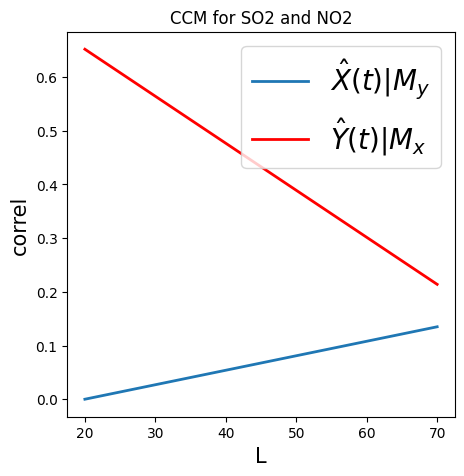

Checking CCM for SO2 and CO


100%|██████████| 2/2 [00:00<00:00, 194.19it/s]


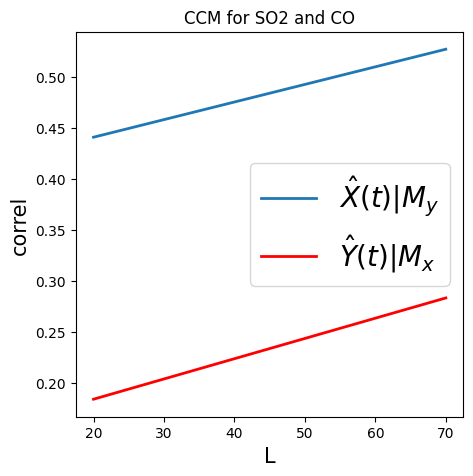

Checking CCM for SO2 and O3


100%|██████████| 2/2 [00:00<00:00, 187.90it/s]


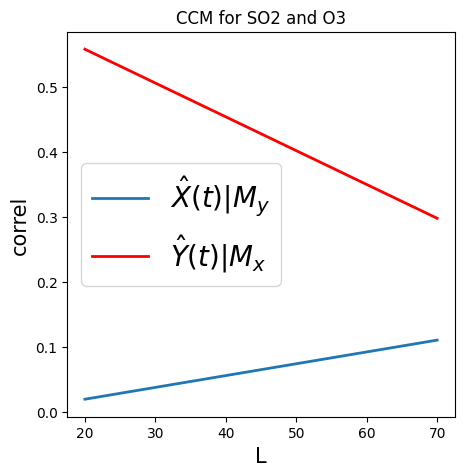

Checking CCM for SO2 and TEMP


100%|██████████| 2/2 [00:00<00:00, 198.00it/s]


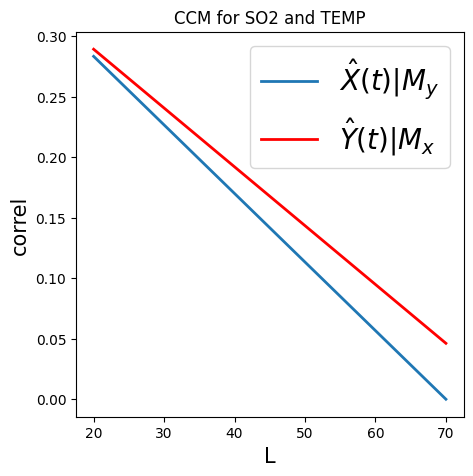

Checking CCM for SO2 and PRES


100%|██████████| 2/2 [00:00<00:00, 201.05it/s]


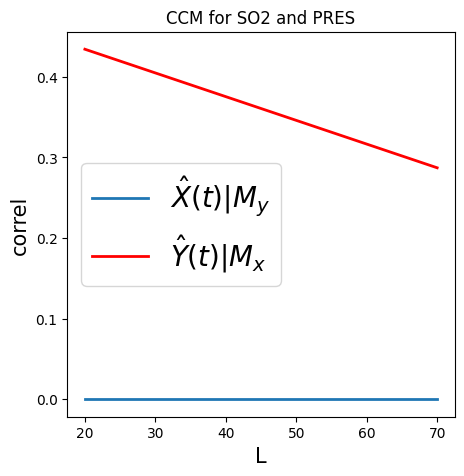

Checking CCM for SO2 and DEWP


100%|██████████| 2/2 [00:00<00:00, 197.31it/s]


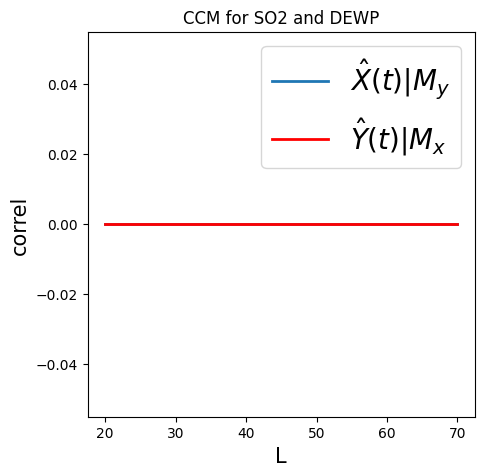

Checking CCM for SO2 and RAIN


100%|██████████| 2/2 [00:00<00:00, 227.99it/s]


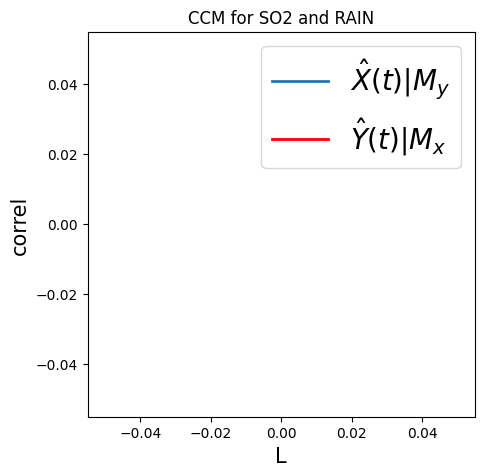

Checking CCM for SO2 and WSPM


100%|██████████| 2/2 [00:00<00:00, 231.54it/s]


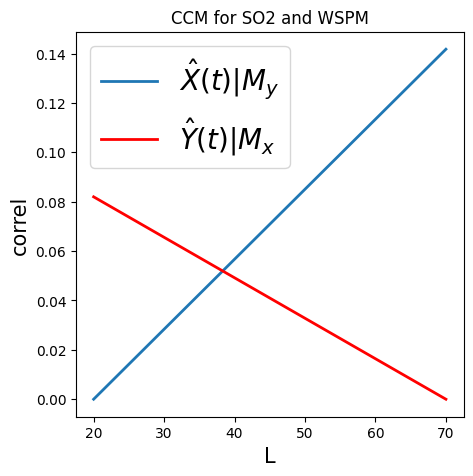

Checking CCM for NO2 and PM2.5


100%|██████████| 2/2 [00:00<00:00, 194.74it/s]


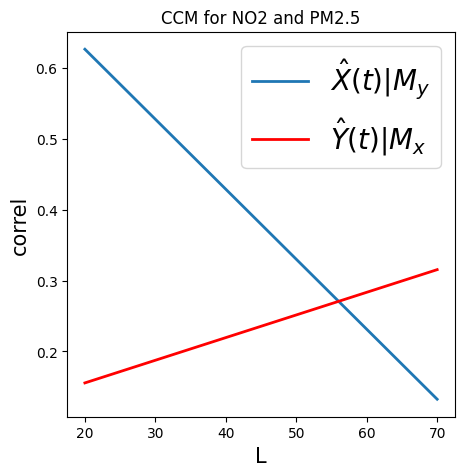

Checking CCM for NO2 and PM10


100%|██████████| 2/2 [00:00<00:00, 192.10it/s]


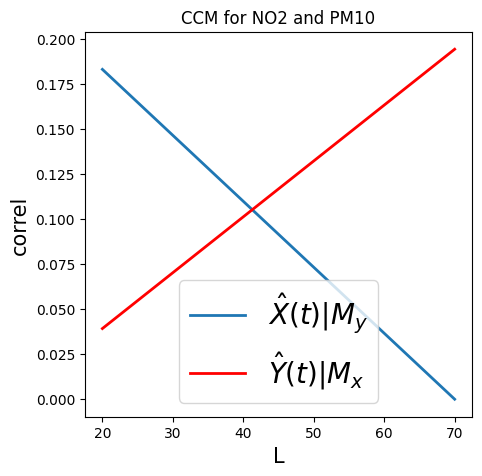

Checking CCM for NO2 and SO2


100%|██████████| 2/2 [00:00<00:00, 195.68it/s]


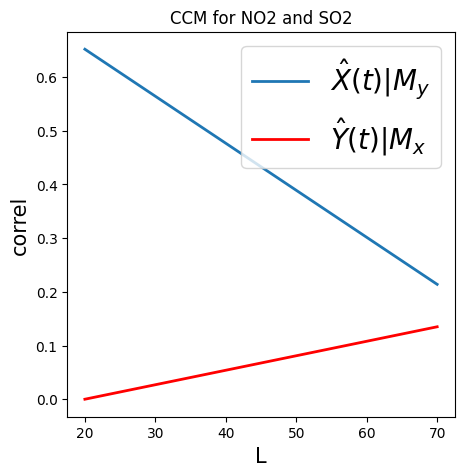

Checking CCM for NO2 and CO


100%|██████████| 2/2 [00:00<00:00, 198.27it/s]


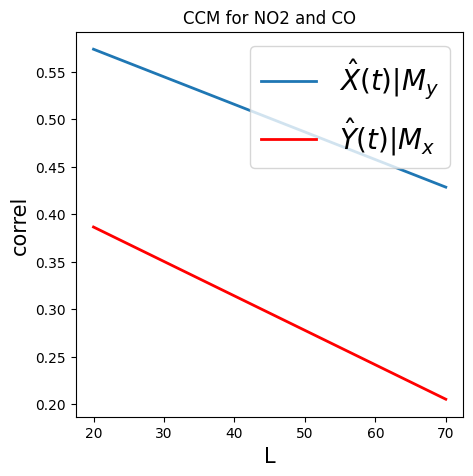

Checking CCM for NO2 and O3


100%|██████████| 2/2 [00:00<00:00, 182.46it/s]


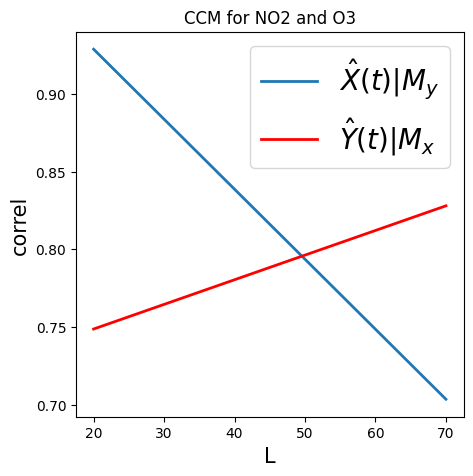

Checking CCM for NO2 and TEMP


100%|██████████| 2/2 [00:00<00:00, 188.90it/s]


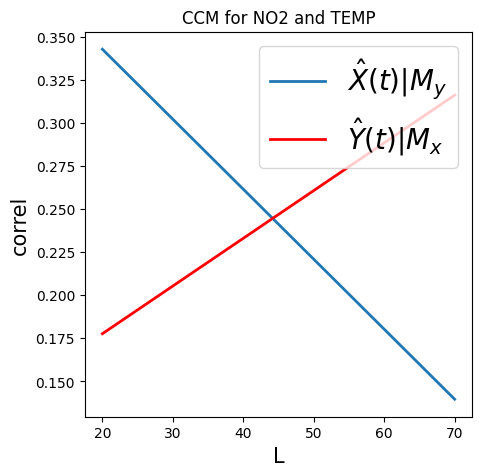

Checking CCM for NO2 and PRES


100%|██████████| 2/2 [00:00<00:00, 193.48it/s]


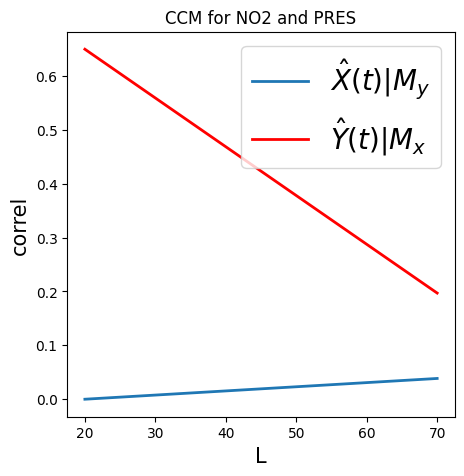

Checking CCM for NO2 and DEWP


100%|██████████| 2/2 [00:00<00:00, 195.45it/s]


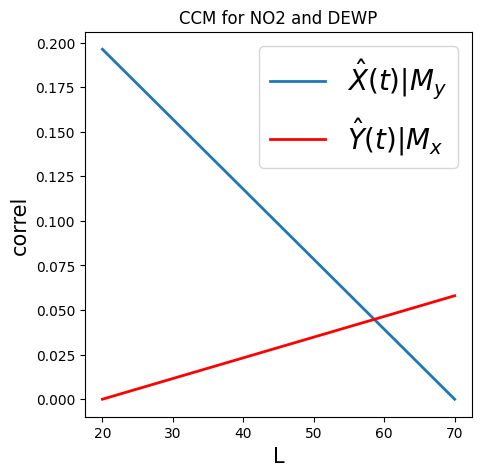

Checking CCM for NO2 and RAIN


100%|██████████| 2/2 [00:00<00:00, 251.72it/s]


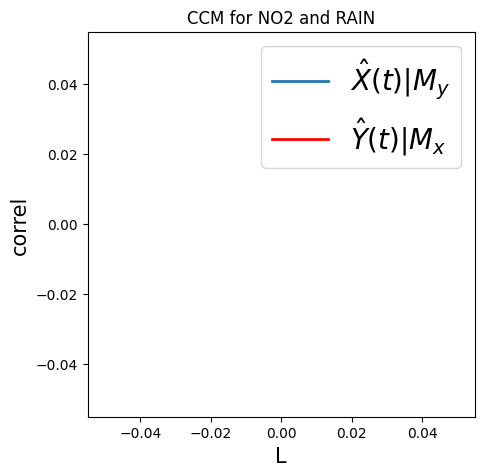

Checking CCM for NO2 and WSPM


100%|██████████| 2/2 [00:00<00:00, 235.85it/s]


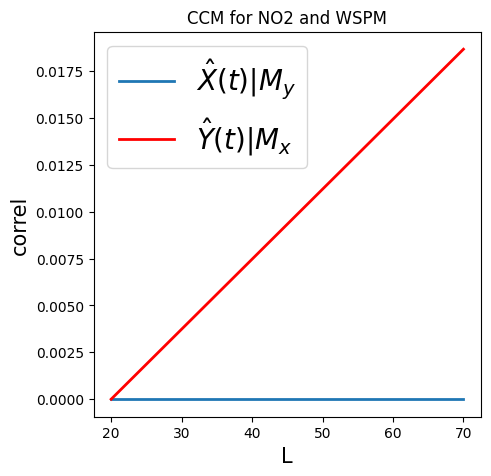

Checking CCM for CO and PM2.5


100%|██████████| 2/2 [00:00<00:00, 196.37it/s]


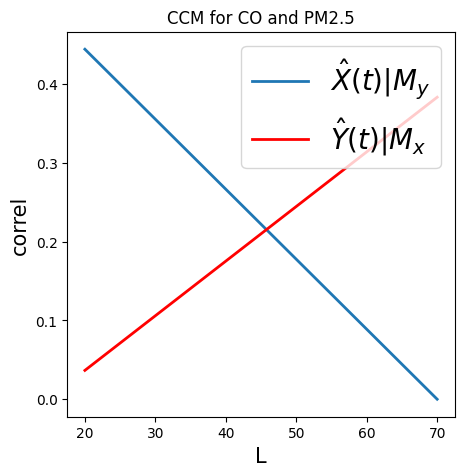

Checking CCM for CO and PM10


100%|██████████| 2/2 [00:00<00:00, 200.58it/s]


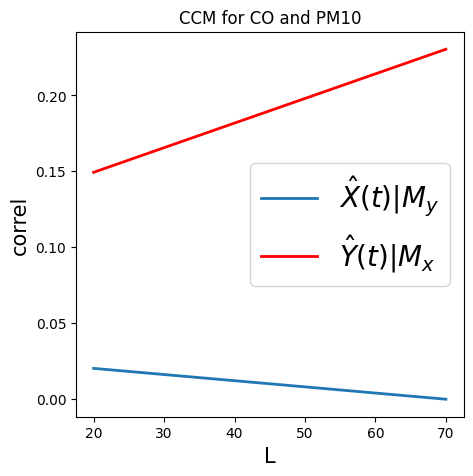

Checking CCM for CO and SO2


100%|██████████| 2/2 [00:00<00:00, 196.86it/s]


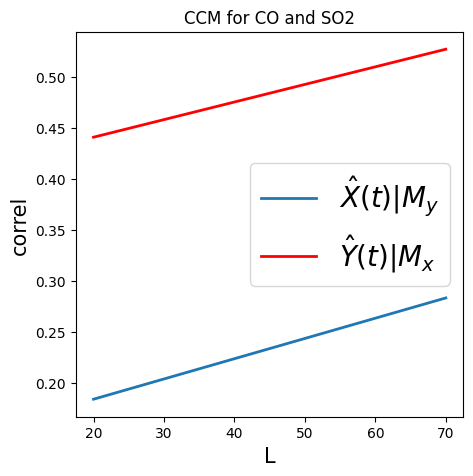

Checking CCM for CO and NO2


100%|██████████| 2/2 [00:00<00:00, 195.03it/s]


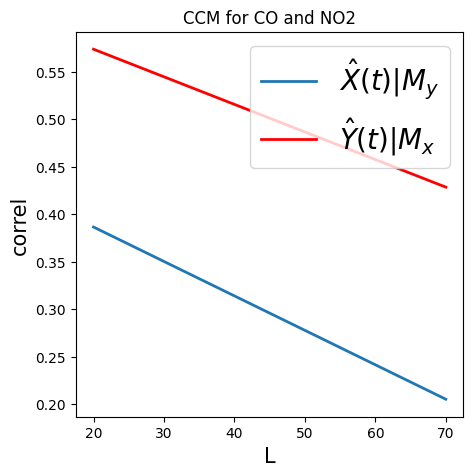

Checking CCM for CO and O3


100%|██████████| 2/2 [00:00<00:00, 195.79it/s]


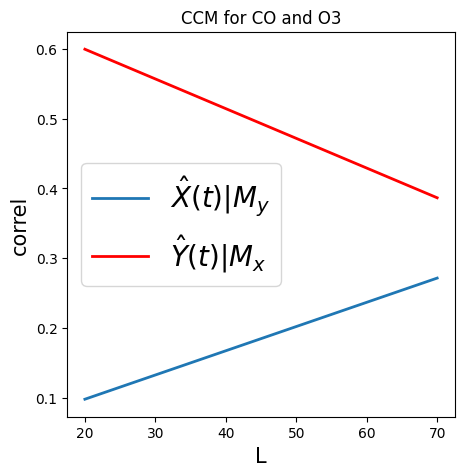

Checking CCM for CO and TEMP


100%|██████████| 2/2 [00:00<00:00, 199.00it/s]


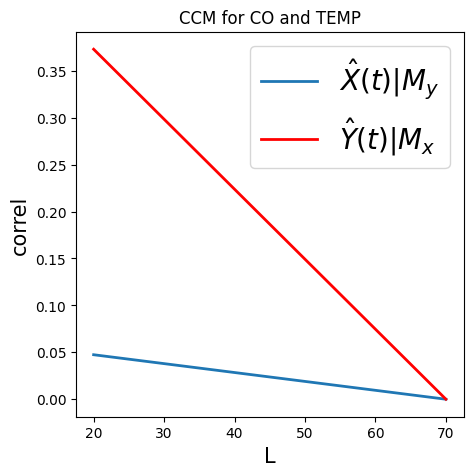

Checking CCM for CO and PRES


100%|██████████| 2/2 [00:00<00:00, 199.23it/s]


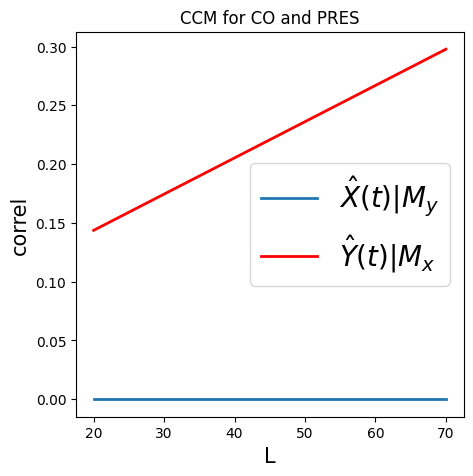

Checking CCM for CO and DEWP


100%|██████████| 2/2 [00:00<00:00, 205.28it/s]


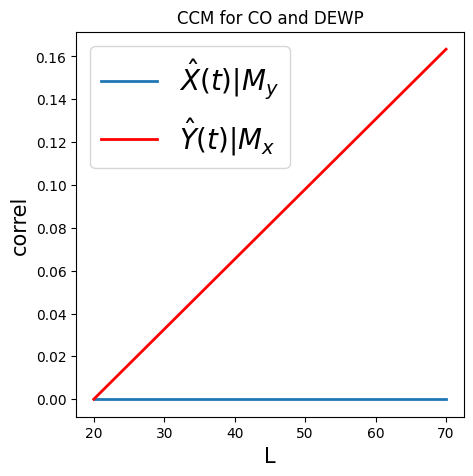

Checking CCM for CO and RAIN


100%|██████████| 2/2 [00:00<00:00, 245.37it/s]


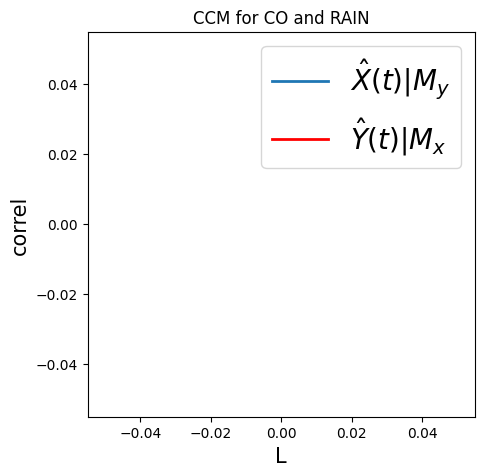

Checking CCM for CO and WSPM


100%|██████████| 2/2 [00:00<00:00, 238.84it/s]


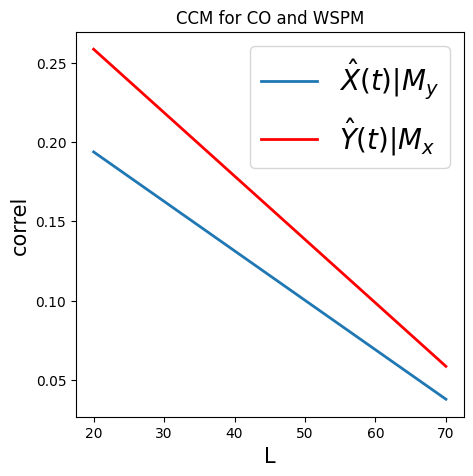

Checking CCM for O3 and PM2.5


100%|██████████| 2/2 [00:00<00:00, 191.42it/s]


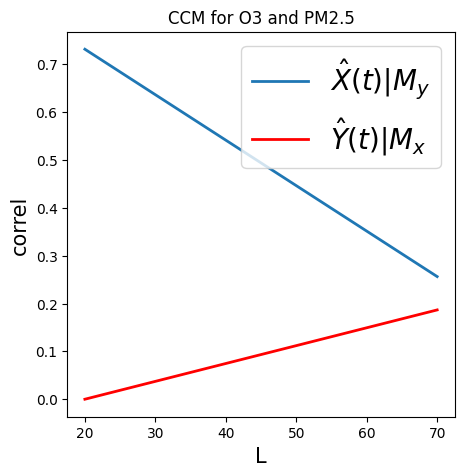

Checking CCM for O3 and PM10


100%|██████████| 2/2 [00:00<00:00, 195.85it/s]


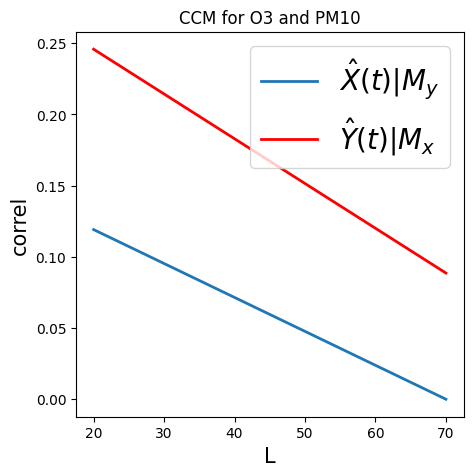

Checking CCM for O3 and SO2


100%|██████████| 2/2 [00:00<00:00, 196.15it/s]


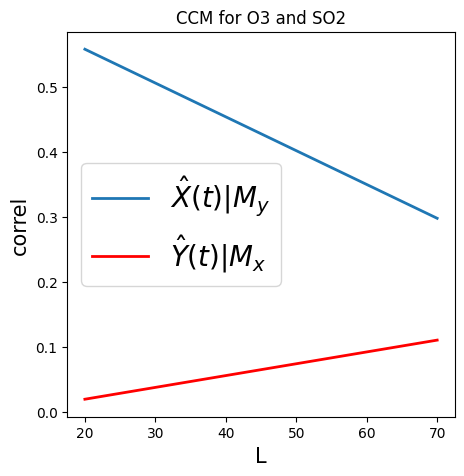

Checking CCM for O3 and NO2


100%|██████████| 2/2 [00:00<00:00, 198.34it/s]


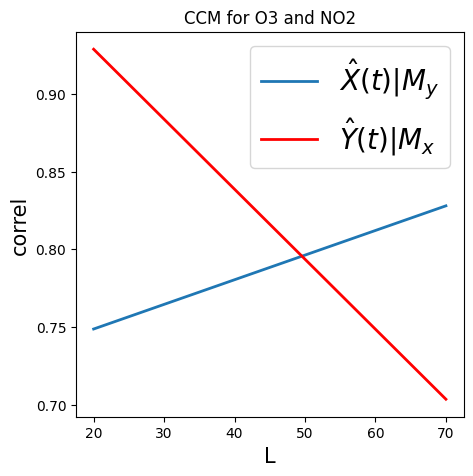

Checking CCM for O3 and CO


100%|██████████| 2/2 [00:00<00:00, 197.59it/s]


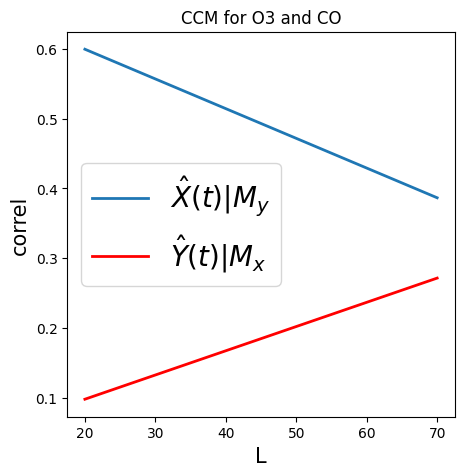

Checking CCM for O3 and TEMP


100%|██████████| 2/2 [00:00<00:00, 197.59it/s]


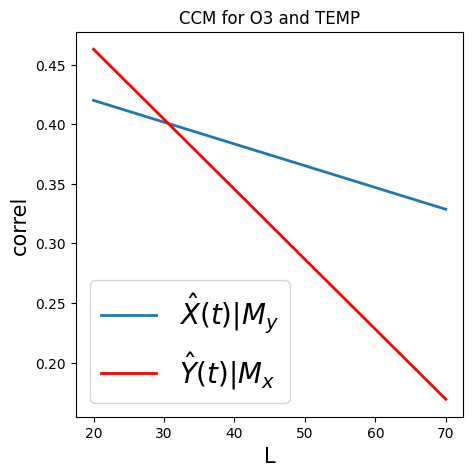

Checking CCM for O3 and PRES


100%|██████████| 2/2 [00:00<00:00, 197.83it/s]


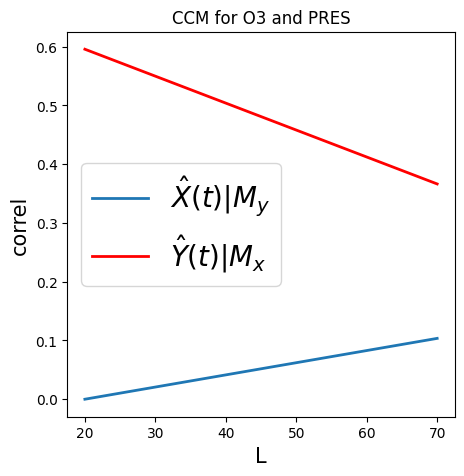

Checking CCM for O3 and DEWP


100%|██████████| 2/2 [00:00<00:00, 198.13it/s]


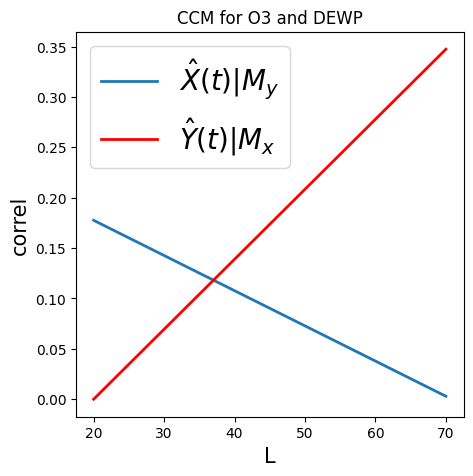

Checking CCM for O3 and RAIN


100%|██████████| 2/2 [00:00<00:00, 250.62it/s]


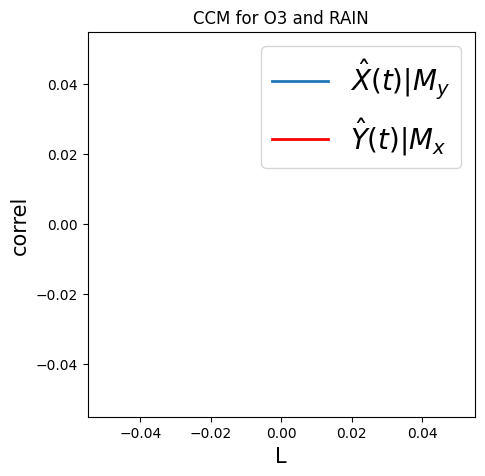

Checking CCM for O3 and WSPM


100%|██████████| 2/2 [00:00<00:00, 234.60it/s]


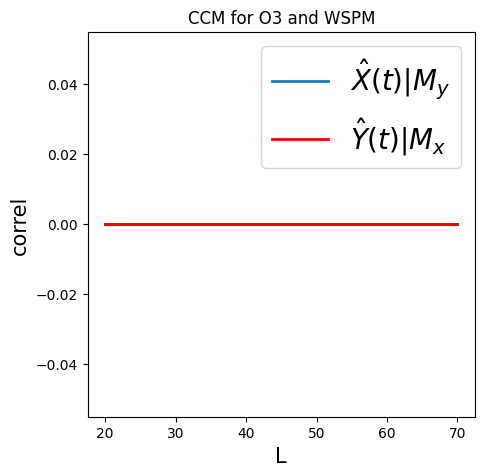

Checking CCM for TEMP and PM2.5


100%|██████████| 2/2 [00:00<00:00, 194.98it/s]


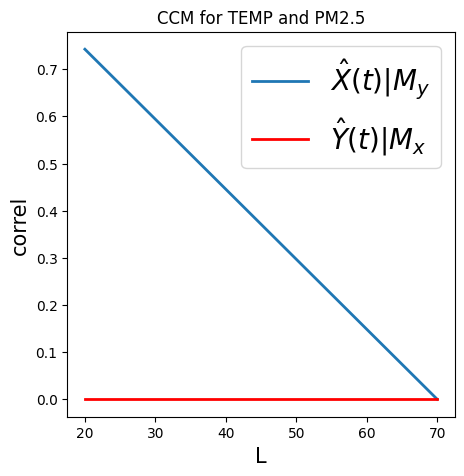

Checking CCM for TEMP and PM10


100%|██████████| 2/2 [00:00<00:00, 202.25it/s]


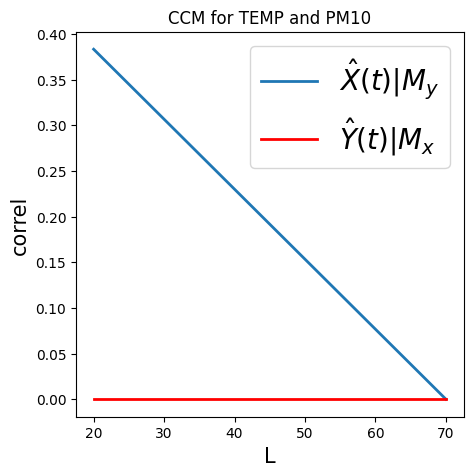

Checking CCM for TEMP and SO2


100%|██████████| 2/2 [00:00<00:00, 197.07it/s]


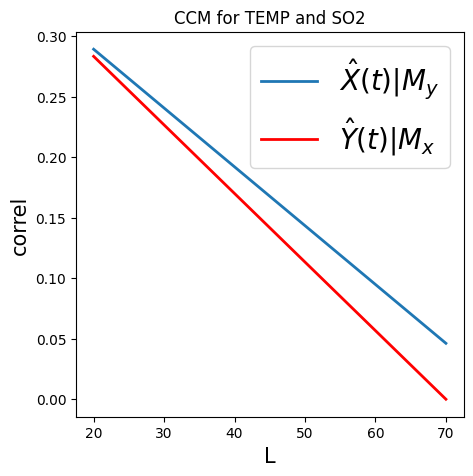

Checking CCM for TEMP and NO2


100%|██████████| 2/2 [00:00<00:00, 200.08it/s]


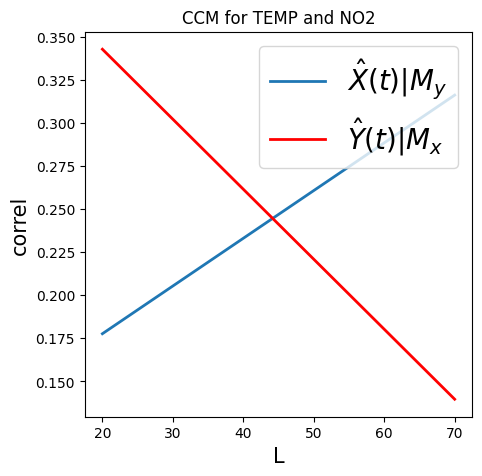

Checking CCM for TEMP and CO


100%|██████████| 2/2 [00:00<00:00, 196.77it/s]


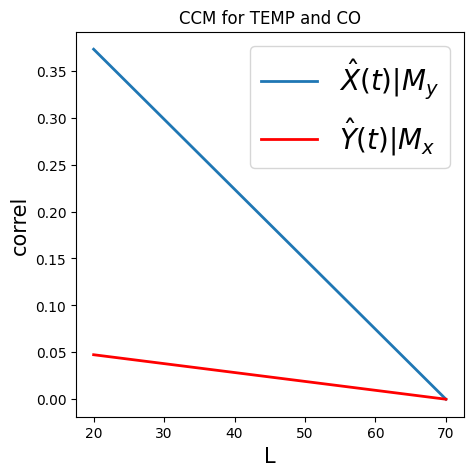

Checking CCM for TEMP and O3


100%|██████████| 2/2 [00:00<00:00, 192.23it/s]


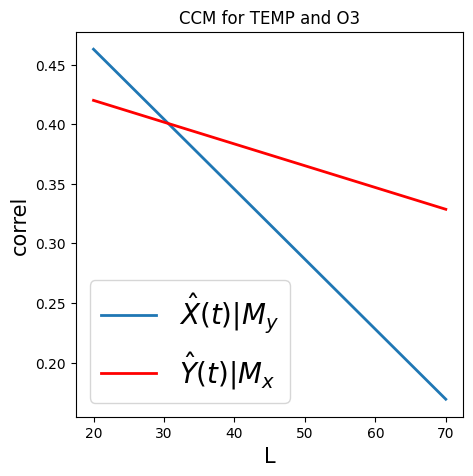

Checking CCM for TEMP and PRES


100%|██████████| 2/2 [00:00<00:00, 199.98it/s]


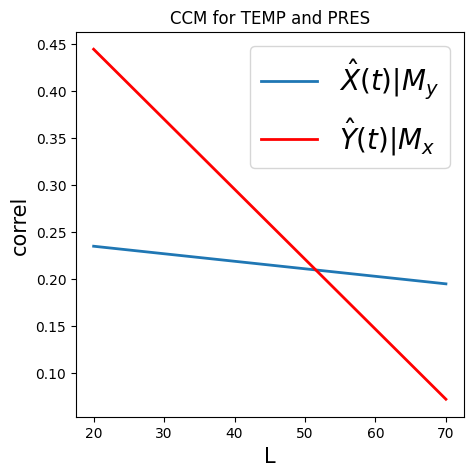

Checking CCM for TEMP and DEWP


100%|██████████| 2/2 [00:00<00:00, 174.38it/s]


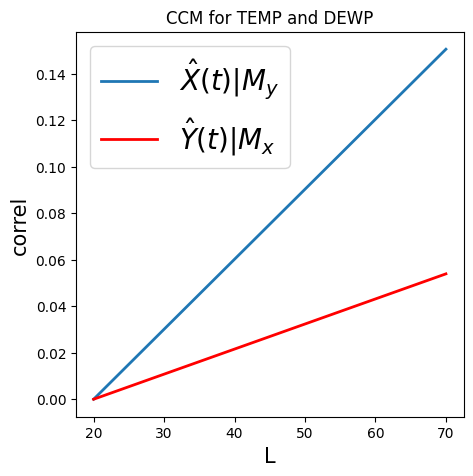

Checking CCM for TEMP and RAIN


100%|██████████| 2/2 [00:00<00:00, 246.33it/s]


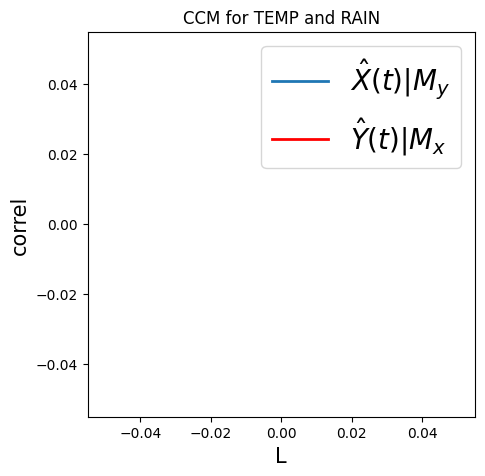

Checking CCM for TEMP and WSPM


100%|██████████| 2/2 [00:00<00:00, 234.02it/s]


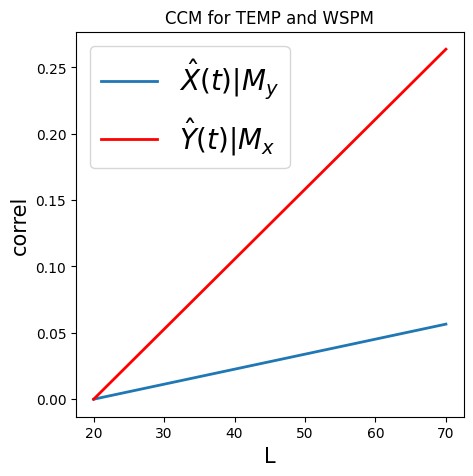

Checking CCM for PRES and PM2.5


100%|██████████| 2/2 [00:00<00:00, 198.29it/s]


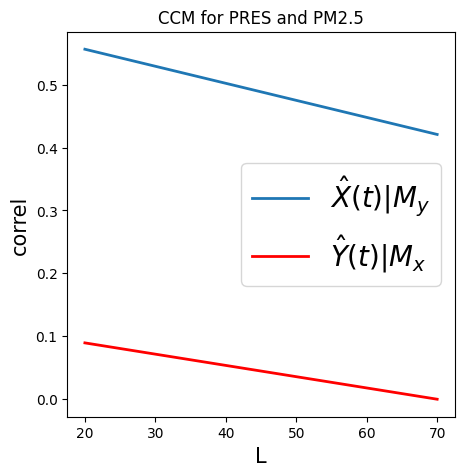

Checking CCM for PRES and PM10


100%|██████████| 2/2 [00:00<00:00, 197.01it/s]


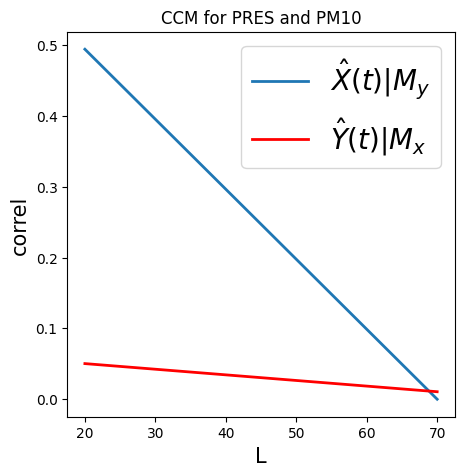

Checking CCM for PRES and SO2


100%|██████████| 2/2 [00:00<00:00, 194.74it/s]


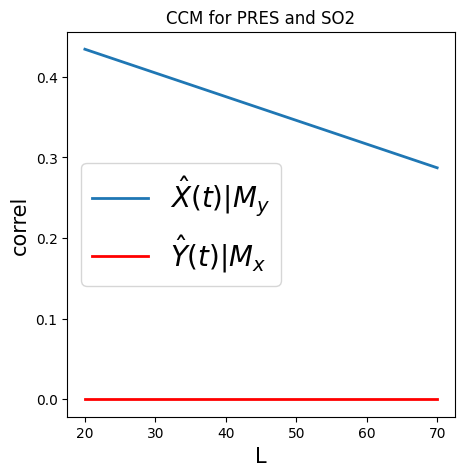

Checking CCM for PRES and NO2


100%|██████████| 2/2 [00:00<00:00, 200.18it/s]


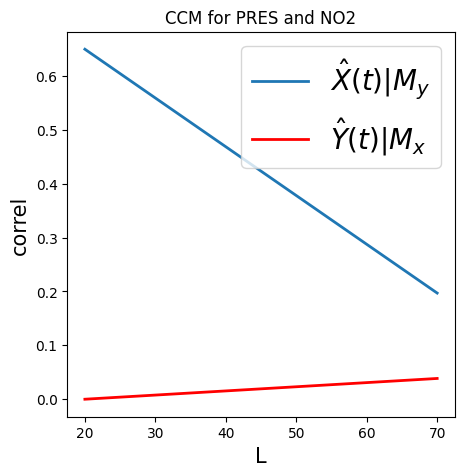

Checking CCM for PRES and CO


100%|██████████| 2/2 [00:00<00:00, 193.59it/s]


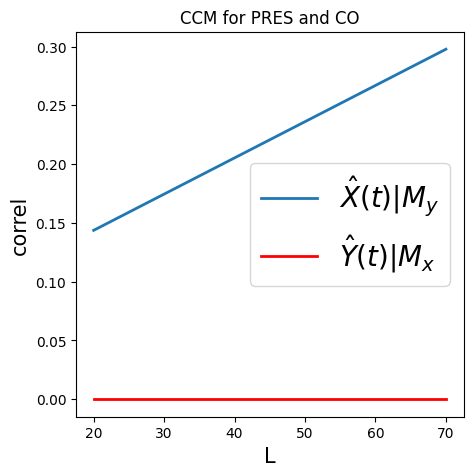

Checking CCM for PRES and O3


100%|██████████| 2/2 [00:00<00:00, 202.02it/s]


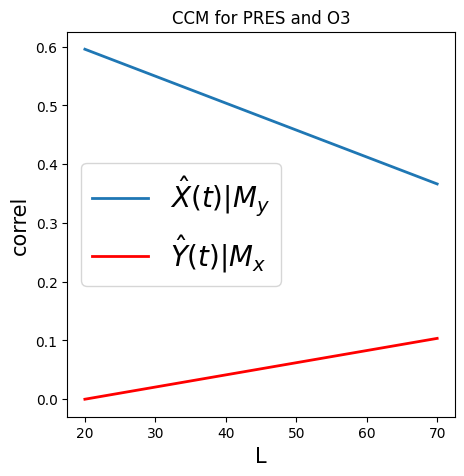

Checking CCM for PRES and TEMP


100%|██████████| 2/2 [00:00<00:00, 178.47it/s]


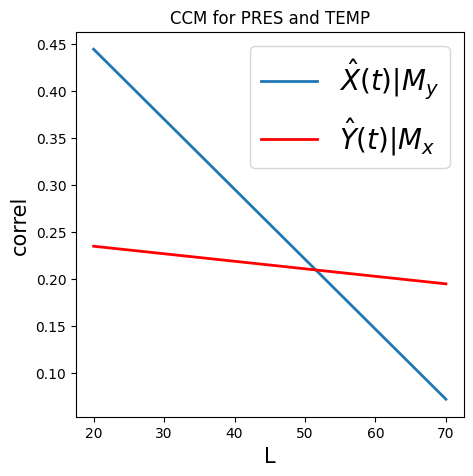

Checking CCM for PRES and DEWP


100%|██████████| 2/2 [00:00<00:00, 194.28it/s]


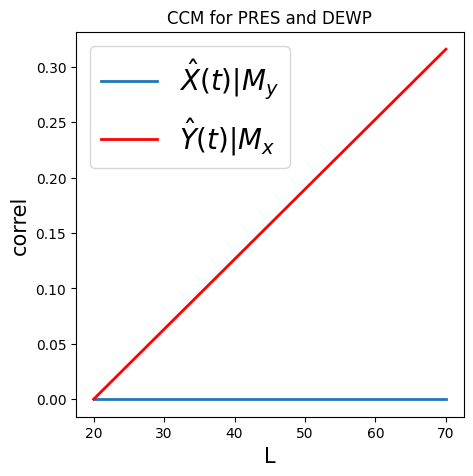

Checking CCM for PRES and RAIN


100%|██████████| 2/2 [00:00<00:00, 249.57it/s]


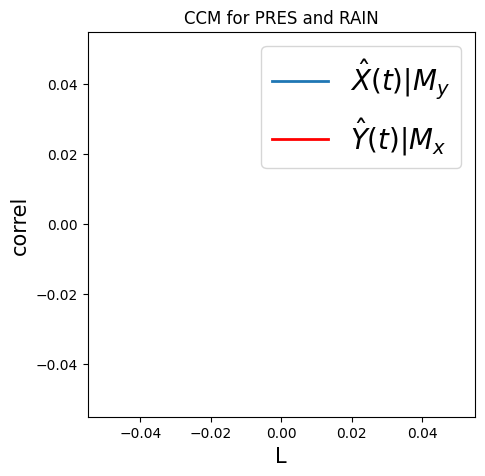

Checking CCM for PRES and WSPM


100%|██████████| 2/2 [00:00<00:00, 238.95it/s]


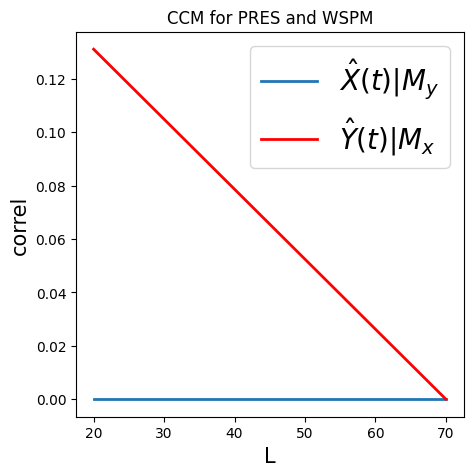

Checking CCM for DEWP and PM2.5


100%|██████████| 2/2 [00:00<00:00, 195.50it/s]


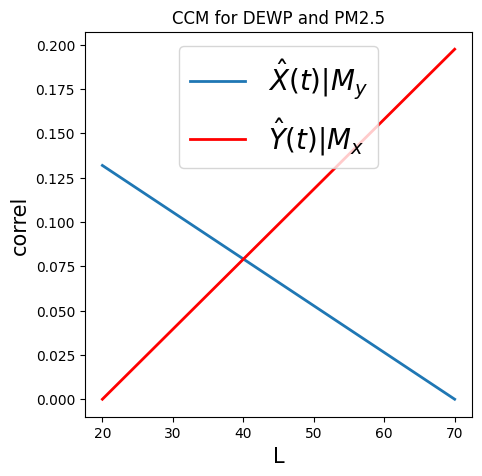

Checking CCM for DEWP and PM10


100%|██████████| 2/2 [00:00<00:00, 191.98it/s]


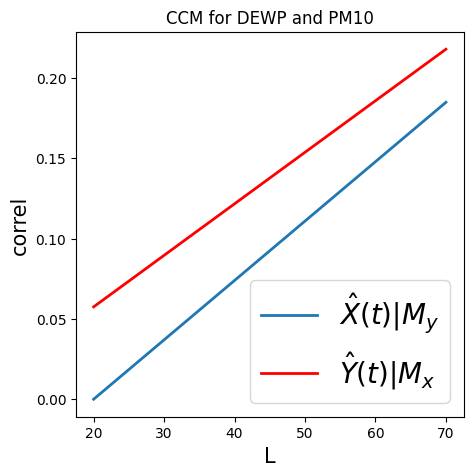

Checking CCM for DEWP and SO2


100%|██████████| 2/2 [00:00<00:00, 194.46it/s]


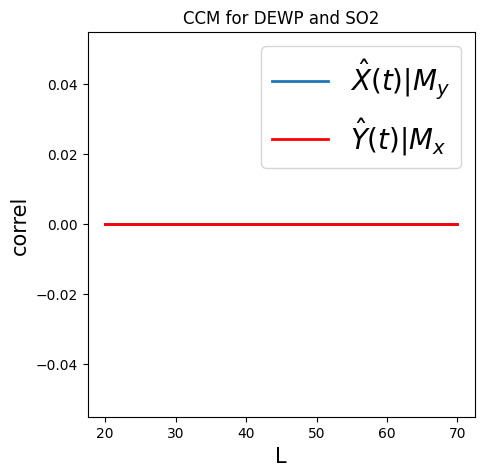

Checking CCM for DEWP and NO2


100%|██████████| 2/2 [00:00<00:00, 196.17it/s]


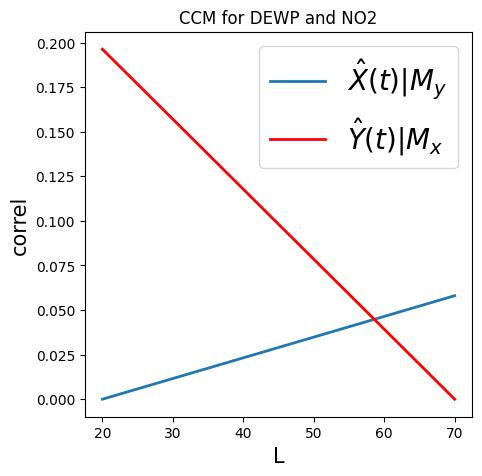

Checking CCM for DEWP and CO


100%|██████████| 2/2 [00:00<00:00, 187.55it/s]


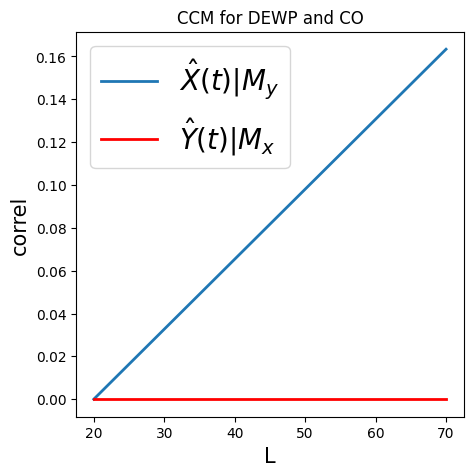

Checking CCM for DEWP and O3


100%|██████████| 2/2 [00:00<00:00, 192.31it/s]


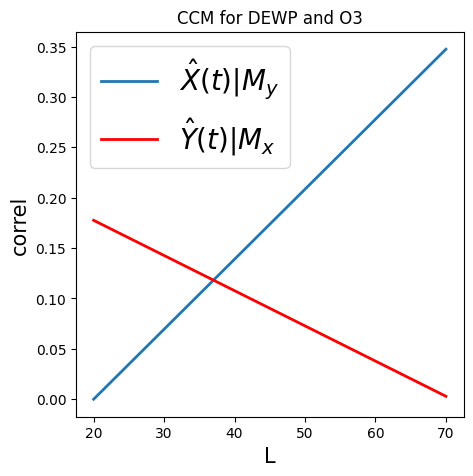

Checking CCM for DEWP and TEMP


100%|██████████| 2/2 [00:00<00:00, 196.40it/s]


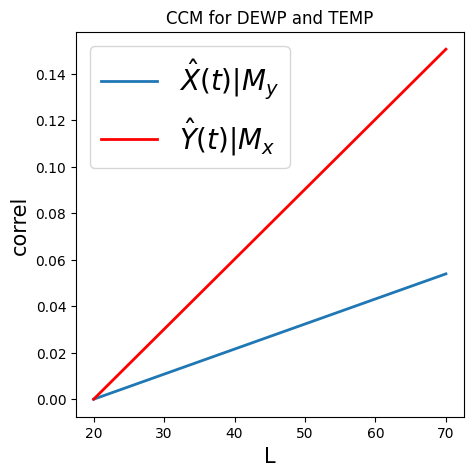

Checking CCM for DEWP and PRES


100%|██████████| 2/2 [00:00<00:00, 198.54it/s]


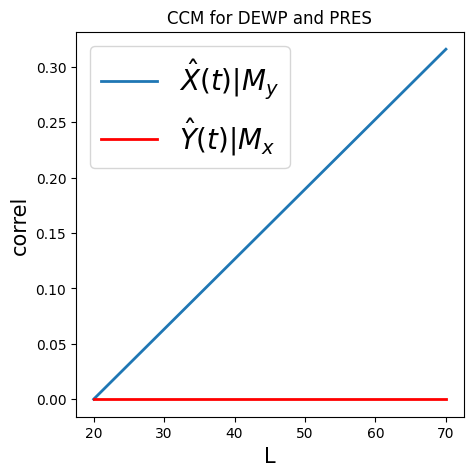

Checking CCM for DEWP and RAIN


100%|██████████| 2/2 [00:00<00:00, 247.47it/s]


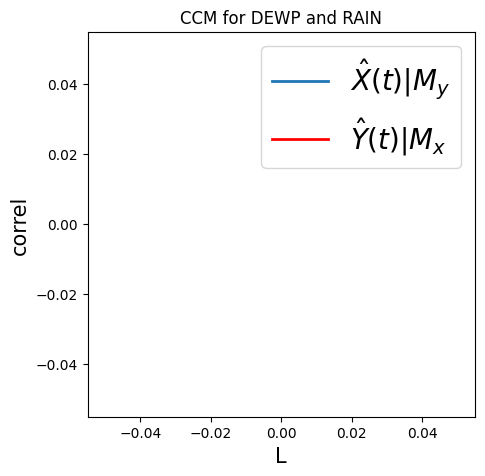

Checking CCM for DEWP and WSPM


100%|██████████| 2/2 [00:00<00:00, 237.70it/s]


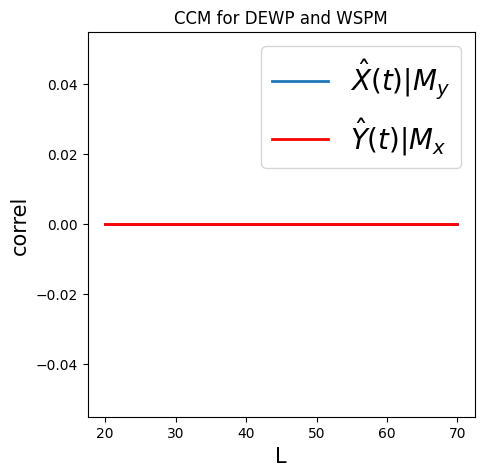

Checking CCM for RAIN and PM2.5


100%|██████████| 2/2 [00:00<00:00, 251.47it/s]


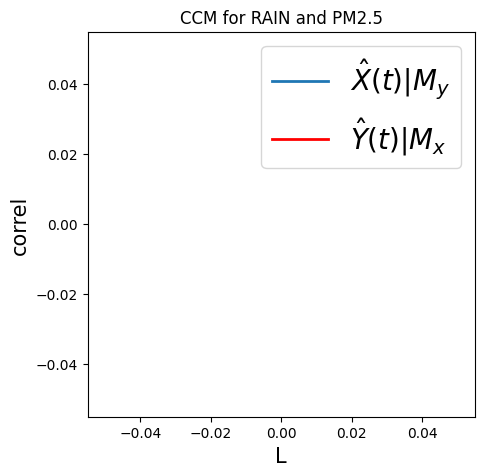

Checking CCM for RAIN and PM10


100%|██████████| 2/2 [00:00<00:00, 247.46it/s]


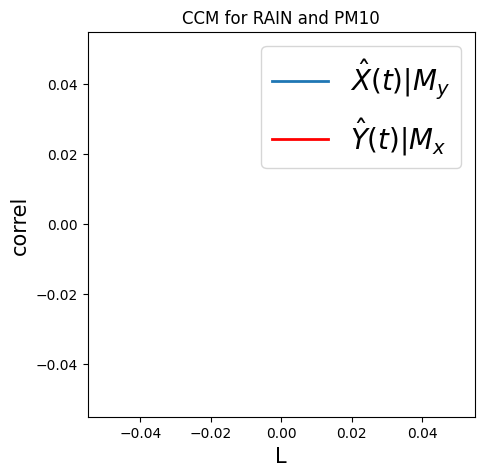

Checking CCM for RAIN and SO2


100%|██████████| 2/2 [00:00<00:00, 250.03it/s]


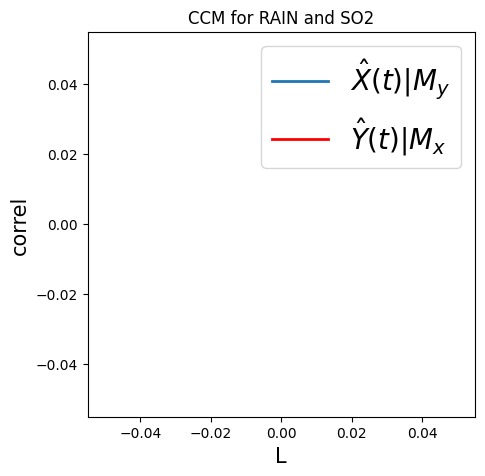

Checking CCM for RAIN and NO2


100%|██████████| 2/2 [00:00<00:00, 245.32it/s]


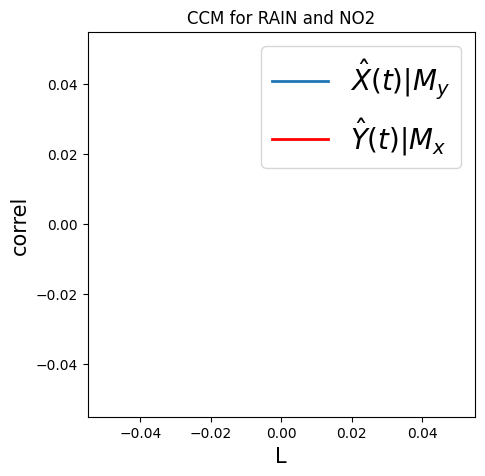

Checking CCM for RAIN and CO


100%|██████████| 2/2 [00:00<00:00, 249.28it/s]


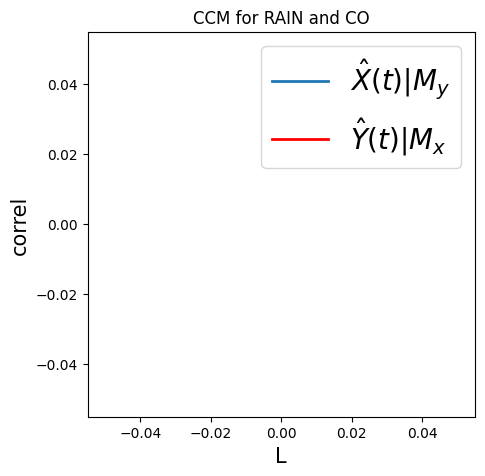

Checking CCM for RAIN and O3


100%|██████████| 2/2 [00:00<00:00, 248.60it/s]


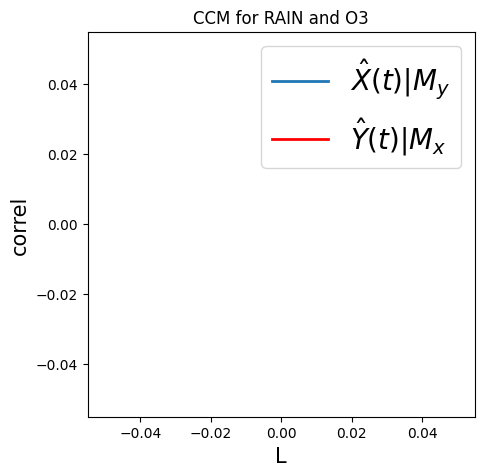

Checking CCM for RAIN and TEMP


100%|██████████| 2/2 [00:00<00:00, 238.27it/s]


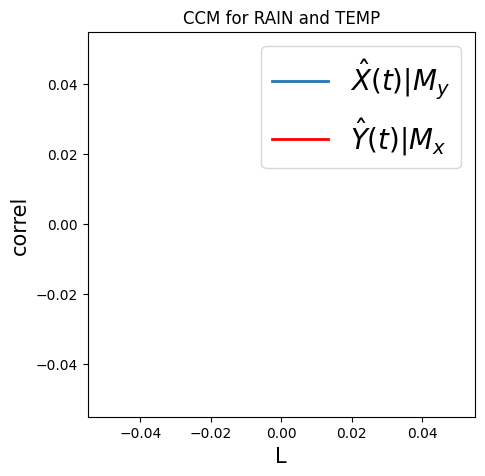

Checking CCM for RAIN and PRES


100%|██████████| 2/2 [00:00<00:00, 252.55it/s]


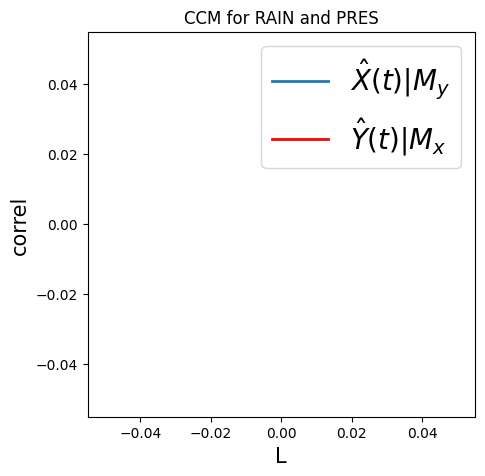

Checking CCM for RAIN and DEWP


100%|██████████| 2/2 [00:00<00:00, 244.50it/s]


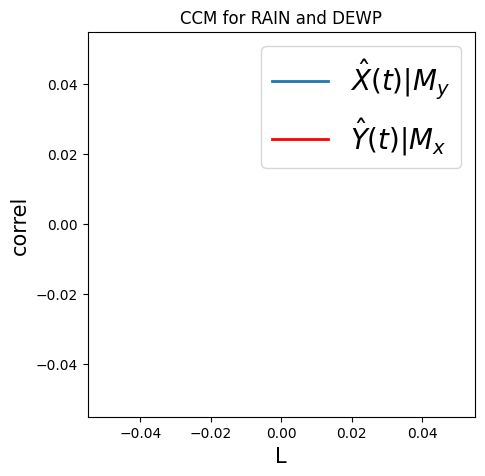

Checking CCM for RAIN and WSPM


100%|██████████| 2/2 [00:00<00:00, 307.13it/s]


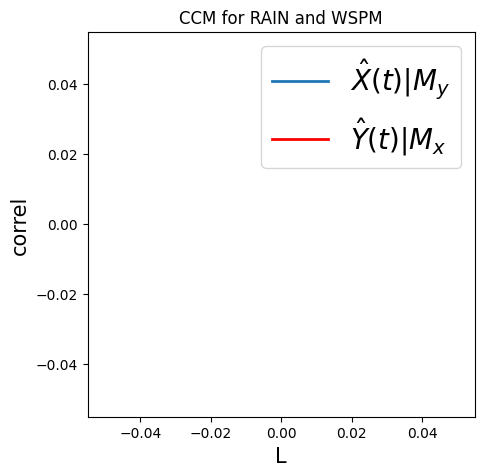

Checking CCM for WSPM and PM2.5


100%|██████████| 2/2 [00:00<00:00, 224.16it/s]


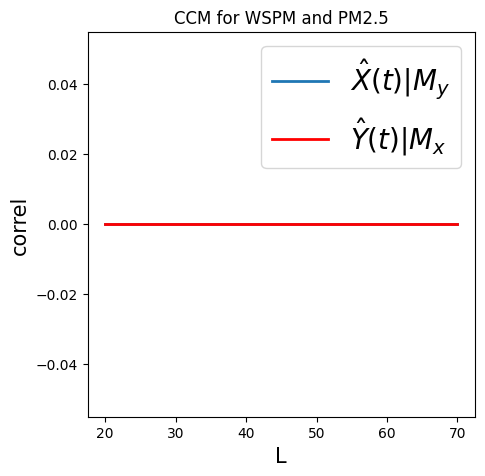

Checking CCM for WSPM and PM10


100%|██████████| 2/2 [00:00<00:00, 226.30it/s]


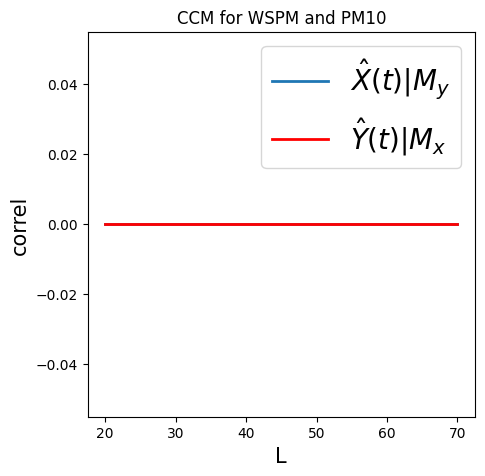

Checking CCM for WSPM and SO2


100%|██████████| 2/2 [00:00<00:00, 227.14it/s]


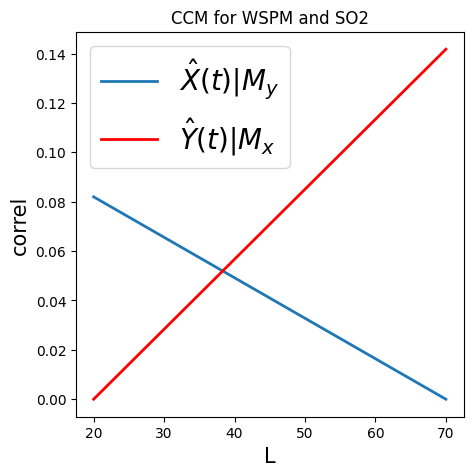

Checking CCM for WSPM and NO2


100%|██████████| 2/2 [00:00<00:00, 225.94it/s]


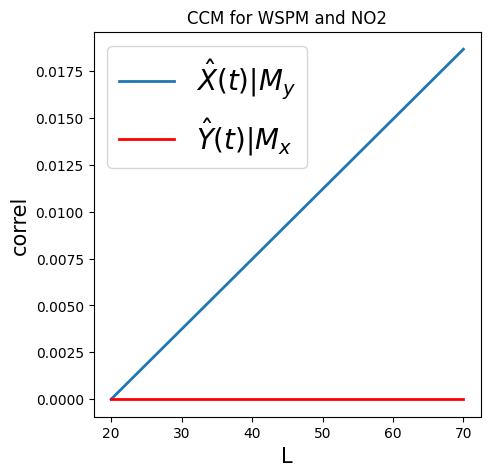

Checking CCM for WSPM and CO


100%|██████████| 2/2 [00:00<00:00, 235.46it/s]


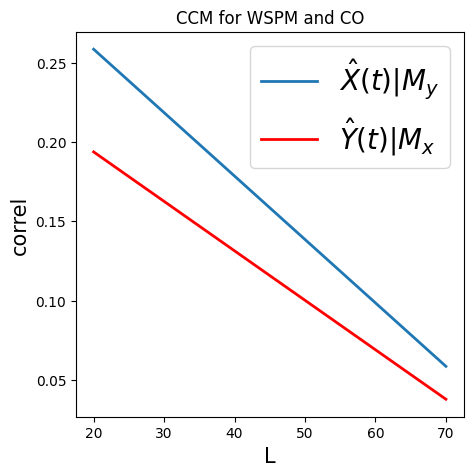

Checking CCM for WSPM and O3


100%|██████████| 2/2 [00:00<00:00, 230.47it/s]


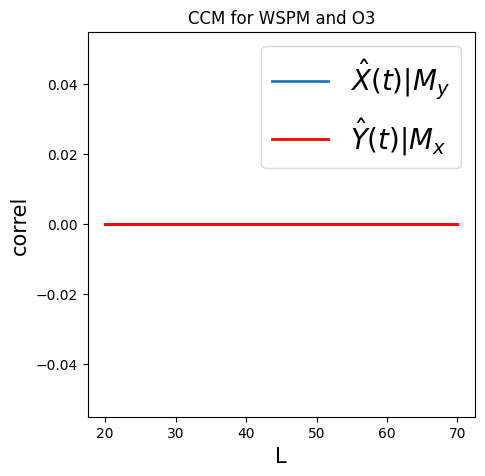

Checking CCM for WSPM and TEMP


100%|██████████| 2/2 [00:00<00:00, 230.92it/s]


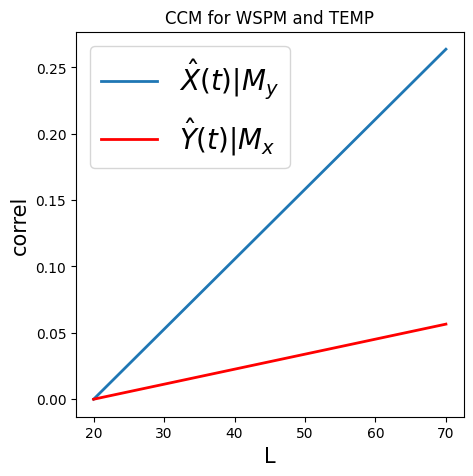

Checking CCM for WSPM and PRES


100%|██████████| 2/2 [00:00<00:00, 225.32it/s]


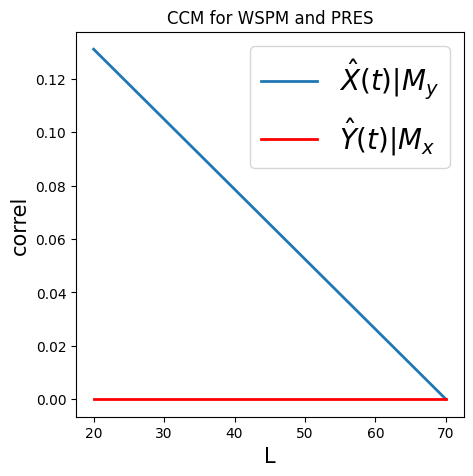

Checking CCM for WSPM and DEWP


100%|██████████| 2/2 [00:00<00:00, 225.48it/s]


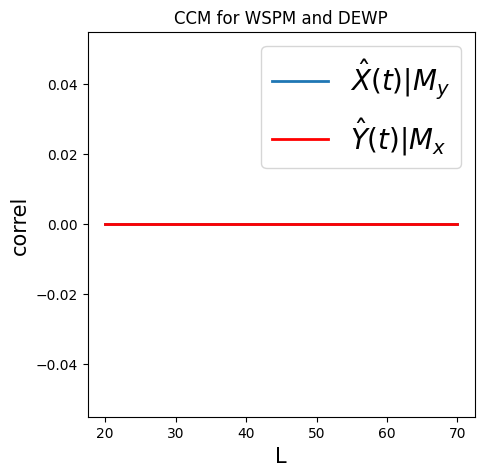

Checking CCM for WSPM and RAIN


100%|██████████| 2/2 [00:00<00:00, 301.34it/s]


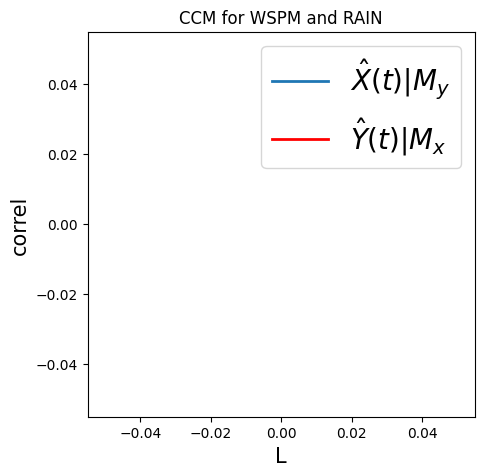

In [250]:
# CCM for all columns
ccm_all_columns(train, 1, 2, range(20, 100, 50))

In [120]:
# Dynamic Time Warping

from dtw import *

# for each column pair in the dataframe calculate the DTW distance
def dtw_all_columns(data):
    for column in data.columns:
        for column_2 in data.columns:
            if column != column_2:
                print(f"Checking DTW for {column} and {column_2}")
                X = data[column].values
                Y = data[column_2].values
                alignment = dtw(X, Y, keep_internals=True)
                # Show score with column names
                print(f"DTW distance between {column} and {column_2} is {alignment.normalizedDistance}")
                # alignment.plot(type="twoway")
                # plt.title(f"DTW for {column} and {column_2}")
                # plt.show()



In [125]:
train.shape

(28049, 13)

In [121]:
dtw_all_columns(train) 

Checking DTW for PM2.5 and PM10
DTW distance between PM2.5 and PM10 is 8.006333201170554
Checking DTW for PM2.5 and SO2
DTW distance between PM2.5 and SO2 is 5.480372139614542
Checking DTW for PM2.5 and NO2


KeyboardInterrupt: 

In [2]:
# Time series index is time, Get rows from 2019-10-15 to 2019-12-10
df['2019-10-15':'2019-12-10']
# Sort df by time index
df.sort_index(inplace=True)

# Find correlation between columns 'CO' and 'SO2'
df['CO'].corr(df['SO2'])
CO = df['CO']
SO2 = df['SO2']

# Plot acf and pacf for CO and SO2
plt.figure(figsize=(12, 6))
plot_acf(CO, lags=50, title='ACF of CO')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(CO, lags=50, title='PACF of CO')
plt.show()

NameError: name 'df' is not defined

In [ ]:
'''Linear vs Nonlinear Hypothesis Testing: You can use F-tests to compare the fit of linear vs. nonlinear models. For instance:
Fit a linear model (e.g., ARIMA).
Fit a nonlinear model (e.g., neural networks, nonlinear regression).
Compare the models using AIC/BIC or likelihood ratio tests to see which better fits the data.'''

# Fit a linear model for CO
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(CO, order=(5,1,0)) # ARIMA model with p=5, d=1, q=0
model_fit = model.fit(disp=0)
print(model_fit.summary())

# Arima prediction
forecast = model_fit.forecast(steps=10)
print(forecast)
# Plot the data
plt.figure(figsize=(12, 6))

plt.plot(CO, label='CO')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
plt.plot(forecast, color='green', label='Forecast')
plt.legend()

# Fit a nonlinear model for CO
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model.fit(CO)

# Compare the models using AIC/BIC or likelihood ratio tests to see which better fits the data
# AIC and BIC for linear model
print(model_fit.aic)
print(model_fit.bic)

# AIC and BIC for nonlinear model
print(model.aic)
print(model.bic)

# Use Granger Causality Test to check for causality

## Non Linear vs Linear

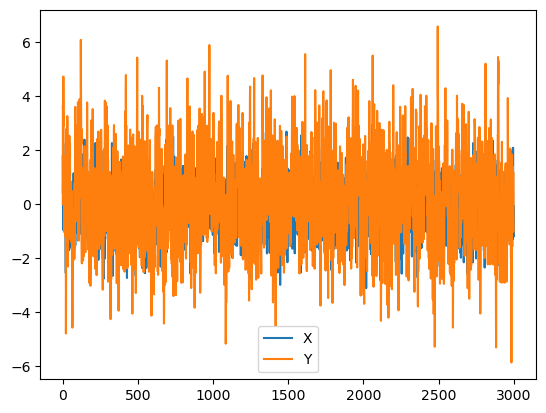

In [3]:
# Code to generate a 3000 steps non linear time series data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate a non-linear time series data
np.random.seed(0)
n = 3000
x = np.random.normal(size=n)
y = np.zeros(n)
for t in range(1, n):
    y[t] = 0.6 * y[t-1] + x[t-1] + 0.1 * x[t-1] * x[t-1] + np.random.normal()
data = pd.DataFrame({'X': x, 'Y': y})
data.plot()
plt.show()

<Figure size 1200x600 with 0 Axes>

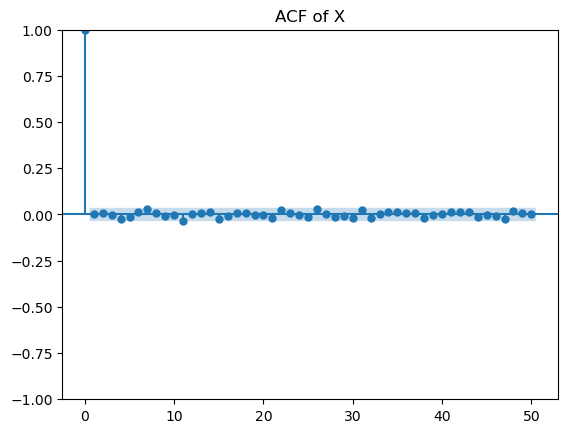

In [5]:
# Plot acf
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12, 6))
plot_acf(data['X'], lags=50, title='ACF of X')
plt.show()

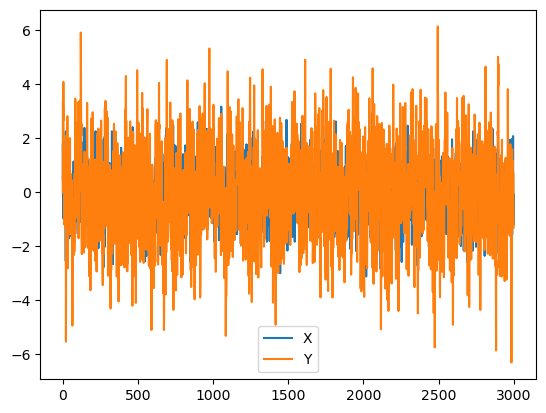

In [6]:
# Code to generate a 3000 steps linear time series data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate a linear time series data
np.random.seed(0)
n = 3000
x = np.random.normal(size=n)
y = np.zeros(n)
for t in range(1, n):
    y[t] = 0.6 * y[t-1] + x[t-1] + np.random.normal()
data = pd.DataFrame({'X': x, 'Y': y})
data.plot()
plt.show()

<Figure size 1200x600 with 0 Axes>

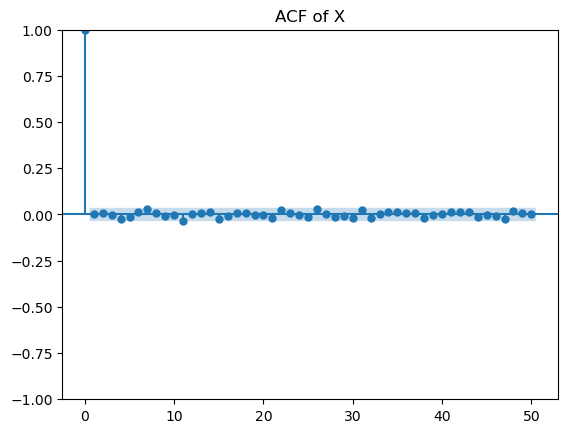

In [7]:
# Plot acf
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12, 6))
plot_acf(data['X'], lags=50, title='ACF of X')
plt.show()


## Sardine SST Anchovy Dataset

In [103]:
sardine_data = pd.read_csv("../data/EDM_data/sardine_anchovy_sst.csv")

In [122]:
dtw_all_columns(sardine_data)

Checking DTW for anchovy and sardine
DTW distance between anchovy and sardine is 0.3462274314410257
Checking DTW for anchovy and sio_sst
DTW distance between anchovy and sio_sst is 0.42131323500000006
Checking DTW for anchovy and np_sst
DTW distance between anchovy and np_sst is 0.4513165136538461
Checking DTW for sardine and anchovy
DTW distance between sardine and anchovy is 0.3462274314410257
Checking DTW for sardine and sio_sst
DTW distance between sardine and sio_sst is 0.46825879995256403
Checking DTW for sardine and np_sst
DTW distance between sardine and np_sst is 0.40582165921410257
Checking DTW for sio_sst and anchovy
DTW distance between sio_sst and anchovy is 0.42131323500000006
Checking DTW for sio_sst and sardine
DTW distance between sio_sst and sardine is 0.46825879995256403
Checking DTW for sio_sst and np_sst
DTW distance between sio_sst and np_sst is 0.3333731471794872
Checking DTW for np_sst and anchovy
DTW distance between np_sst and anchovy is 0.4513165136538461
Che

In [123]:
sardine_data.shape

(78, 4)

In [106]:
sardine_data.set_index('year', inplace=True)

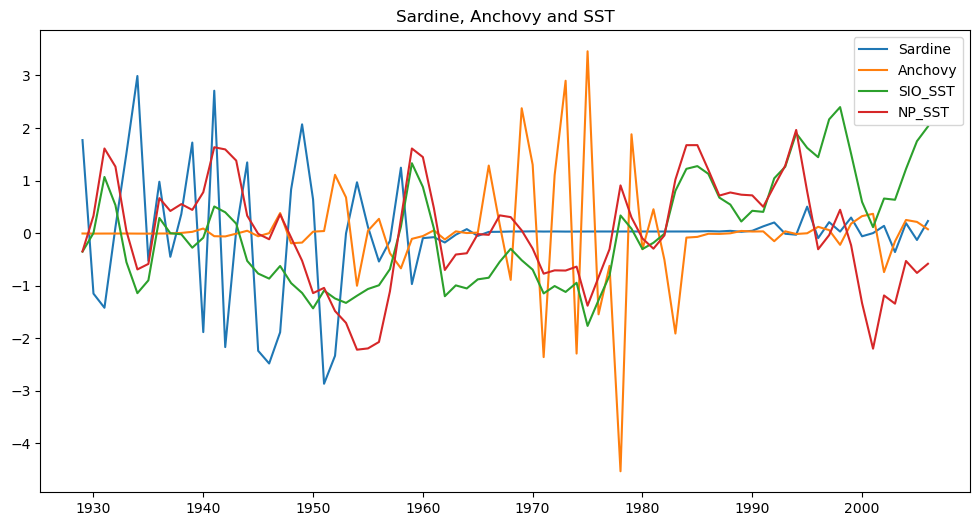

Checking CCM for anchovy and sardine


100%|██████████| 2/2 [00:00<00:00, 27.97it/s]

X->Y r 0.0 p value 0.3404
Y->X r 0.0 p value 0.046


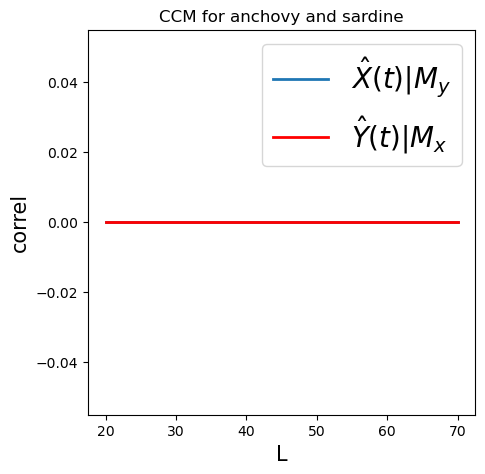

Checking CCM for anchovy and sio_sst


100%|██████████| 2/2 [00:00<00:00, 262.88it/s]

X->Y r 0.06 p value 0.6287
Y->X r 0.0 p value 0.8603


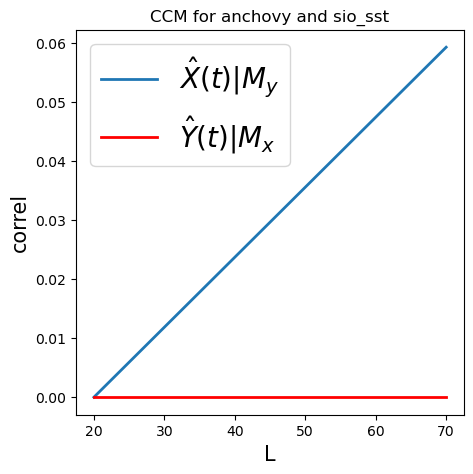

Checking CCM for anchovy and np_sst


100%|██████████| 2/2 [00:00<00:00, 266.70it/s]

X->Y r 0.17 p value 0.1504
Y->X r 0.05 p value 0.6538


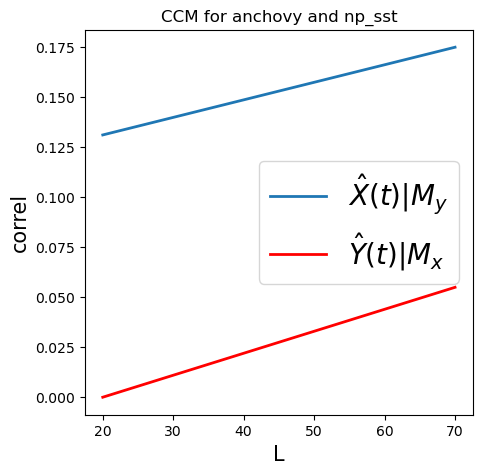

Checking CCM for sardine and anchovy


100%|██████████| 2/2 [00:00<00:00, 259.54it/s]

X->Y r 0.0 p value 0.046
Y->X r 0.0 p value 0.3404


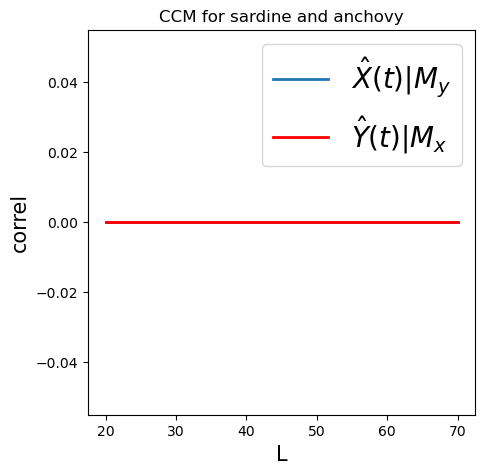

Checking CCM for sardine and sio_sst


100%|██████████| 2/2 [00:00<00:00, 287.06it/s]

X->Y r 0.0 p value 0.8721
Y->X r 0.3 p value 0.0137


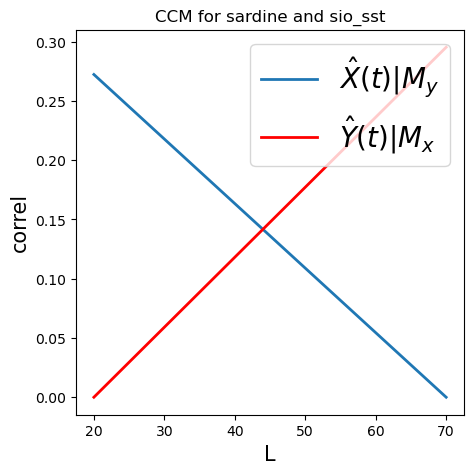

Checking CCM for sardine and np_sst


100%|██████████| 2/2 [00:00<00:00, 294.21it/s]

X->Y r 0.18 p value 0.1312
Y->X r 0.01 p value 0.9273


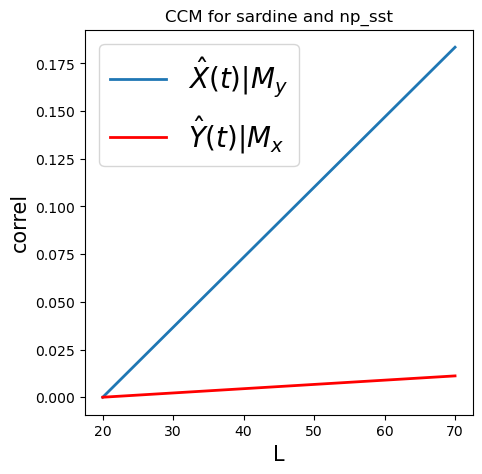

Checking CCM for sio_sst and anchovy


100%|██████████| 2/2 [00:00<00:00, 280.42it/s]

X->Y r 0.0 p value 0.8603
Y->X r 0.06 p value 0.6287


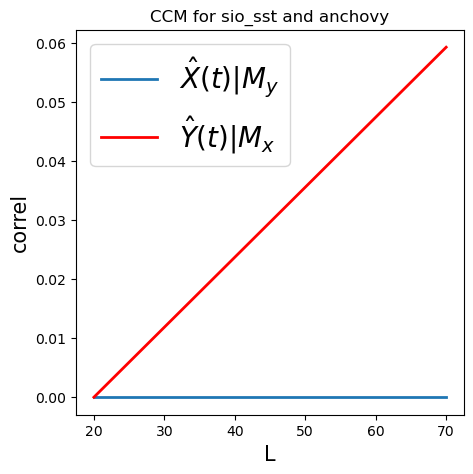

Checking CCM for sio_sst and sardine


100%|██████████| 2/2 [00:00<00:00, 286.41it/s]

X->Y r 0.3 p value 0.0137
Y->X r 0.0 p value 0.8721


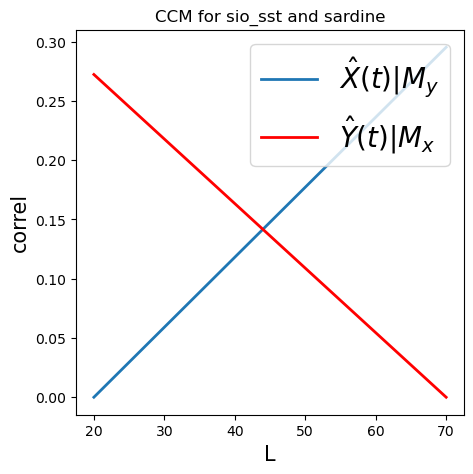

Checking CCM for sio_sst and np_sst


100%|██████████| 2/2 [00:00<00:00, 310.42it/s]


X->Y r 0.63 p value 0.0
Y->X r 0.77 p value 0.0


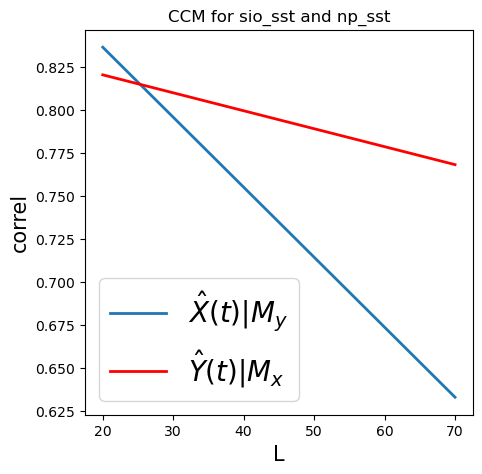

Checking CCM for np_sst and anchovy


100%|██████████| 2/2 [00:00<00:00, 281.85it/s]


X->Y r 0.05 p value 0.6538
Y->X r 0.17 p value 0.1504


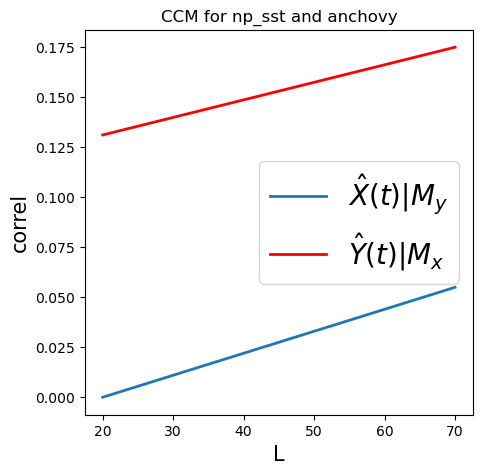

Checking CCM for np_sst and sardine


100%|██████████| 2/2 [00:00<00:00, 266.14it/s]

X->Y r 0.01 p value 0.9273
Y->X r 0.18 p value 0.1312


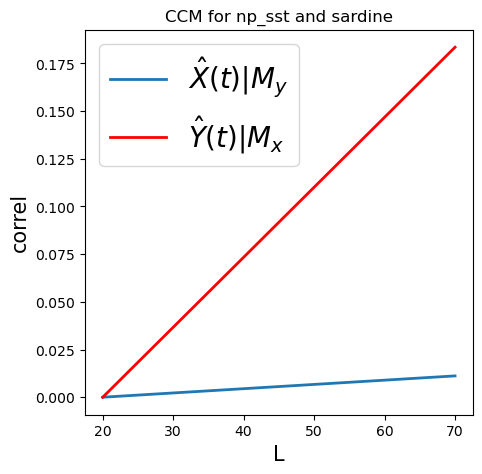

Checking CCM for np_sst and sio_sst


100%|██████████| 2/2 [00:00<00:00, 173.52it/s]

X->Y r 0.77 p value 0.0
Y->X r 0.63 p value 0.0


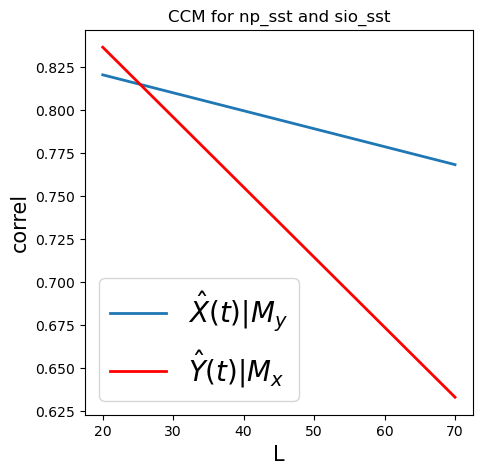

In [130]:
ccm_all_columns(sardine_data, 1, 2, range(20, 100, 50))

# Public Data Analysis

In [43]:
data_dir_elc = "../data/MVTSDS/multivariate-time-series-data-master/electricity/electricity.txt/electricity.txt"
data_dir_solar = "../data/MVTSDS/multivariate-time-series-data-master/solar-energy/solar_AL.txt/solar_AL.txt"
data_dir_traffic = "../data/MVTSDS/multivariate-time-series-data-master/traffic/traffic.txt/traffic.txt"
data_dir_exchange_rate = "../data/MVTSDS/multivariate-time-series-data-master/exchange_rate/exchange_rate.txt/exchange_rate.txt"
etth1 = "../data/ETTh1.csv"

In [44]:
df = pd.read_csv(
            etth1
        )

In [47]:
df.head()

HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
date                                                                    
2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000

In [46]:
# Set the time index
df.set_index('date', inplace=True)

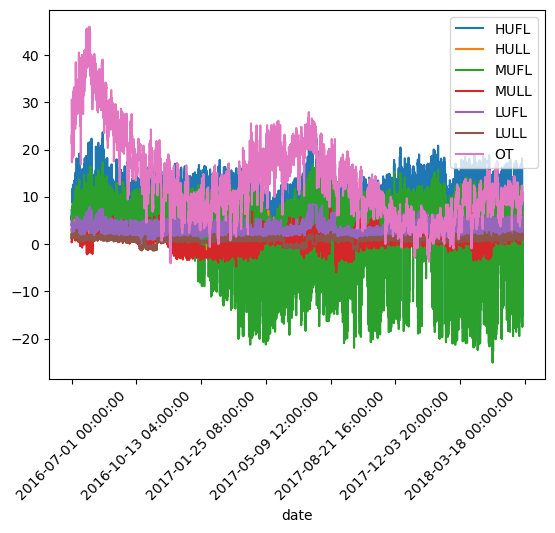

In [51]:
# Plot the time series data
# x rotation 45
df.plot()
plt.xticks(rotation=45)
plt.show()

In [9]:
test_data = pd.read_csv(
    "../data/ECL/ECL.csv",
    # parse_dates=[timestamp_column],
)

In [14]:
test_data.shape

(26304, 322)

In [12]:
cols

['MT_000',
 'MT_001',
 'MT_002',
 'MT_003',
 'MT_004',
 'MT_005',
 'MT_006',
 'MT_007',
 'MT_008',
 'MT_009',
 'MT_010',
 'MT_011',
 'MT_012',
 'MT_013',
 'MT_014',
 'MT_015',
 'MT_016',
 'MT_017',
 'MT_018',
 'MT_019',
 'MT_020',
 'MT_021',
 'MT_022',
 'MT_023',
 'MT_024',
 'MT_025',
 'MT_026',
 'MT_027',
 'MT_028',
 'MT_029',
 'MT_030',
 'MT_031',
 'MT_032',
 'MT_033',
 'MT_034',
 'MT_035',
 'MT_036',
 'MT_037',
 'MT_038',
 'MT_039',
 'MT_040',
 'MT_041',
 'MT_042',
 'MT_043',
 'MT_044',
 'MT_045',
 'MT_046',
 'MT_047',
 'MT_048',
 'MT_049',
 'MT_050',
 'MT_051',
 'MT_052',
 'MT_053',
 'MT_054',
 'MT_055',
 'MT_056',
 'MT_057',
 'MT_058',
 'MT_059',
 'MT_060',
 'MT_061',
 'MT_062',
 'MT_063',
 'MT_064',
 'MT_065',
 'MT_066',
 'MT_067',
 'MT_068',
 'MT_069',
 'MT_070',
 'MT_071',
 'MT_072',
 'MT_073',
 'MT_074',
 'MT_075',
 'MT_076',
 'MT_077',
 'MT_078',
 'MT_079',
 'MT_080',
 'MT_081',
 'MT_082',
 'MT_083',
 'MT_084',
 'MT_085',
 'MT_086',
 'MT_087',
 'MT_088',
 'MT_089',
 'MT_090',

In [ ]:
 from transformers import PatchTSTConfig
 from tsfm_public.toolkit.dataset import ForecastDFDataset

 # Standard
import os

# Third Party
from transformers import (
    EarlyStoppingCallback,
    PatchTSTConfig,
    PatchTSTForPrediction,
    set_seed,
    Trainer,
    TrainingArguments,
)
import numpy as np
import pandas as pd

# First Party
from tsfm_public.toolkit.dataset import ForecastDFDataset
from tsfm_public.toolkit.time_series_preprocessor import TimeSeriesPreprocessor
from tsfm_public.toolkit.util import select_by_index

# supress some warnings
import warnings

warnings.filterwarnings("ignore", module="torch")

set_seed(2023)

dataset_path = "./ECL.csv"
timestamp_column = "date"
id_columns = []

context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 1  # Reduce this if you have low number of CPU cores
batch_size = 16 # Adjust according to GPU memory

data = pd.read_csv(
    dataset_path,
    parse_dates=[timestamp_column],
)
forecast_columns = list(data.columns[1:])

# get split
num_train = int(len(data) * 0.7)
num_test = int(len(data) * 0.2)
num_valid = len(data) - num_train - num_test

border1s = [
    0,  # Start of the training data
    num_train - context_length,  # Start of validation data (shifted back by `context_length`)
    len(data) - num_test - context_length,  # Start of testing data (shifted back by `context_length`)
]
border2s = [
    num_train,  # End of training data
    num_train + num_valid,  # End of validation data
    len(data),  # End of the dataset
]

train_start_index = border1s[0]  # None indicates beginning of dataset
train_end_index = border2s[0]

# we shift the start of the evaluation period back by context length so that
# the first evaluation timestamp is immediately following the training data
valid_start_index = border1s[1]
valid_end_index = border2s[1]

test_start_index = border1s[2]
test_end_index = border2s[2]

train_data = select_by_index(
    data,
    id_columns=id_columns,
    start_index=train_start_index,
    end_index=train_end_index,
)
valid_data = select_by_index(
    data,
    id_columns=id_columns,
    start_index=valid_start_index,
    end_index=valid_end_index,
)
test_data = select_by_index(
    data,
    id_columns=id_columns,
    start_index=test_start_index,
    end_index=test_end_index,
)

time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=id_columns,
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=True,
)
time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=id_columns,
    timestamp_column="date",
    observable_columns=forecast_columns,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)
valid_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(valid_data),
    id_columns=id_columns,
    timestamp_column="date",
    observable_columns=forecast_columns,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)
test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=id_columns,
    timestamp_column="date",
    observable_columns=forecast_columns,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/electricity/pretrain/output/",
    overwrite_output_dir=True,
    # learning_rate=0.001,
    num_train_epochs=10,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

# Create the early stopping callback
early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,  # Number of epochs with no improvement after which to stop
    early_stopping_threshold=0.0001,  # Minimum improvement required to consider as improvement
)

# define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    callbacks=[early_stopping_callback],
    # compute_metrics=compute_metrics,
)

# pretrain
trainer.train()

results = trainer.evaluate(test_dataset)
print("Test result:")
print(results)

save_dir = "patchtst/electricity/model/pretrain/"
os.makedirs(save_dir, exist_ok=True)
trainer.save_model(save_dir)

print(f"Loading target dataset: {dataset}")
dataset_path = f"https://raw.githubusercontent.com/zhouhaoyi/ETDataset/main/ETT-small/{dataset}.csv"
timestamp_column = "date"
id_columns = []
forecast_columns = ["HUFL", "HULL", "MUFL", "MULL", "LUFL", "LULL", "OT"]
train_start_index = None  # None indicates beginning of dataset
train_end_index = 12 * 30 * 24

# we shift the start of the evaluation period back by context length so that
# the first evaluation timestamp is immediately following the training data
valid_start_index = 12 * 30 * 24 - context_length
valid_end_index = 12 * 30 * 24 + 4 * 30 * 24

test_start_index = 12 * 30 * 24 + 4 * 30 * 24 - context_length
test_end_index = 12 * 30 * 24 + 8 * 30 * 24


data = pd.read_csv(
    dataset_path,
    parse_dates=[timestamp_column],
)

train_data = select_by_index(
    data,
    id_columns=id_columns,
    start_index=train_start_index,
    end_index=train_end_index,
)
valid_data = select_by_index(
    data,
    id_columns=id_columns,
    start_index=valid_start_index,
    end_index=valid_end_index,
)
test_data = select_by_index(
    data,
    id_columns=id_columns,
    start_index=test_start_index,
    end_index=test_end_index,
)

time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=id_columns,
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=True,
)
time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=id_columns,
    observable_columns=forecast_columns,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)
valid_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(valid_data),
    id_columns=id_columns,
    observable_columns=forecast_columns,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)
test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=id_columns,
    observable_columns=forecast_columns,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

finetune_forecast_model = PatchTSTForPrediction.from_pretrained(
    "patchtst/electricity/model/pretrain/",
    num_input_channels=len(forecast_columns),
    head_dropout=0.7,
)

finetune_forecast_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/transfer/finetune/output/",
    overwrite_output_dir=True,
    learning_rate=0.0001,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    report_to="tensorboard",
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/transfer/finetune/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

# Create a new early stopping callback with faster convergence properties
early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,  # Number of epochs with no improvement after which to stop
    early_stopping_threshold=0.001,  # Minimum improvement required to consider as improvement
)

finetune_forecast_trainer = Trainer(
    model=finetune_forecast_model,
    args=finetune_forecast_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    callbacks=[early_stopping_callback],
)

print("\n\nDoing zero-shot forecasting on target data")
result = finetune_forecast_trainer.evaluate(test_dataset)
print("Target data zero-shot forecasting result:")
print(result)

# CRYPTO IS Short term dependent?

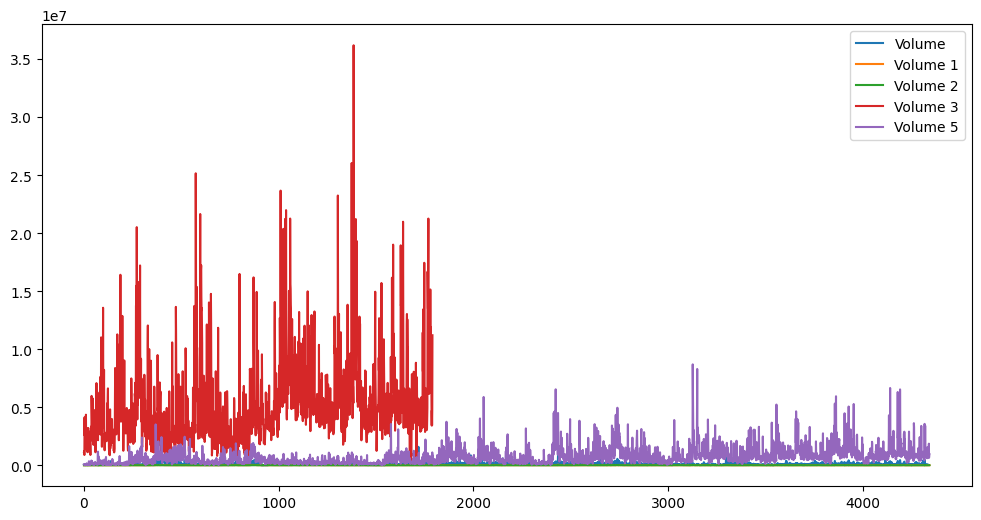

In [22]:
# import plot_acf and plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
cry = pd.read_csv("../processed_ds/crypto-data/crypto-0/crypto-0.csv")
cry1 = pd.read_csv("../processed_ds/crypto-data/crypto-1/crypto-1.csv")
cry2 = pd.read_csv("../processed_ds/crypto-data/crypto-2/crypto-2.csv")
cry3 = pd.read_csv("../processed_ds/crypto-data/crypto-3/crypto-3.csv")
cry5 = pd.read_csv("../processed_ds/crypto-data/crypto-5/crypto-5.csv")
# Columns: Index(['date', 'Open', 'High', 'Low', 'OT', 'Volume'], dtype='object')
# Plot cry volume

# Plot cry - cry5 volume on the same plot
plt.figure(figsize=(12, 6))
plt.plot(cry['Volume'], label='Volume')
plt.plot(cry1['Volume'], label='Volume 1')
plt.plot(cry2['Volume'], label='Volume 2')
plt.plot(cry3['Volume'], label='Volume 3')
plt.plot(cry5['Volume'], label='Volume 5')
plt.legend()
plt.show()

# # Determine if Volume has short term dependency or long term dependency
# # Plot acf and pacf for cry volume
# plt.figure(figsize=(12, 6))
# plot_acf(cry['Volume'], lags=32, title='ACF of Volume')
# plt.show()

# plt.figure(figsize=(12, 6))
# plot_pacf(cry['Volume'], lags=32, title='PACF of Volume')
# plt.show()
